# <center>Telecom Churn Case Study</center>

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("telecom_churn_data.csv")

In [4]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Missing Value Imputation

In [6]:
#drop null rows 
df=df.dropna(how="all")

In [7]:
#drop duplicate values
df=df.drop_duplicates()

In [8]:
df.shape

(99999, 226)

In [9]:
#Check % of NULL values again now
100*(df.isnull().sum()/len(df.index))

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

Assuming wherever the customer has recharged, the values are captured correctly, we can impute NULL values with 0 for columns related to recharge data/voice. Same for night pack user columns and fb user columns.

In [10]:
zero_impute_cols=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
               'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
               'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
               'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
               'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
               'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

df[zero_impute_cols] = df[zero_impute_cols].apply(lambda x: x.fillna(0))

#Check % of NULL values again now
100*(df.isnull().sum()/len(df.index))

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

In [11]:
#list of columns having missing value
list_of_missing_val_col=list(df.loc[:,df.isnull().sum()/len(df)>0].columns.values)
print(list_of_missing_val_col)
print(len(list_of_missing_val_col))

#Remove the date columns from that list
list_of_missing_val_col.remove('date_of_last_rech_6')
list_of_missing_val_col.remove('date_of_last_rech_7')
list_of_missing_val_col.remove('date_of_last_rech_8')
list_of_missing_val_col.remove('date_of_last_rech_9')

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t

In [12]:
# Replacing all continous value with median value
continous_var=[]

continous_var=[var for var in list_of_missing_val_col
                   if (df[var].nunique()>8) ]
print(len(continous_var))

112


In [13]:
df[continous_var].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00
mean,132.40,133.67,133.02,130.30,197.94,197.05,196.57,190.34,9.95,7.15,7.29,6.34,13.91,9.82,9.97,8.56,47.10,46.47,45.89,44.58,93.34,91.40,91.76,90.46,3.75,3.79,3.68,3.66,1.12,1.37,1.43,1.23,144.20,141.67,141.33,138.71,79.83,83.30,83.28,82.34,87.30,90.80,89.84,86.28,1.13,1.12,1.07,1.04,168.26,175.22,174.19,169.66,0.80,0.78,0.79,0.72,3.92,4.98,5.05,4.41,0.45,0.03,0.03,0.05,47.92,47.99,47.21,46.28,107.48,107.12,108.46,106.16,12.08,12.60,11.75,12.17,167.49,167.72,167.43,164.62,9.58,10.01,9.88,9.43,20.72,21.66,21.18,19.62,2.16,2.22,2.09,2.17,32.46,33.89,33.15,31.23,0.06,0.03,0.04,0.16,7.46,8.33,8.44,8.06,0.85,1.01,0.97,1.02
std,297.21,308.79,308.95,308.48,316.85,325.86,327.17,319.40,72.83,73.45,68.40,57.14,71.44,58.46,64.71,58.44,150.86,155.32,151.18,148.00,162.78,157.49,156.54,158.68,14.23,14.26,13.27,13.46,5.45,7.53,6.78,5.62,251.75,248.73,245.91,245.93,252.48,263.63,265.49,267.18,255.62,269.35,271.76,261.41,7.98,8.60,7.91,8.26,389.95,408.92,411.63,405.14,25.77,25.60,25.54,21.31,14.94,20.66,17.86,16.33,4.13,2.16,2.32,3.64,140.26,145.80,137.24,140.13,171.71,169.42,169.72,165.49,40.14,42.98,39.13,43.84,254.12,256.24,250.03,249.85,54.33,57.41,55.07,53.38,80.79,86.52,83.68,74.91,16.50,16.45,15.81,15.98,106.28,113.72,110.13,101.98,0.16,0.16,0.15,0.53,59.72,65.22,63.81,63.51,11.96,12.67,13.28,12.38
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [14]:
df[continous_var] = df[continous_var].apply(pd.to_numeric, errors='coerce')

In [15]:
def fillnawithMedian():
    for col in continous_var:
        df[col].fillna(df[col].median(),inplace=True)

fillnawithMedian()

In [16]:
df[continous_var].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,0.00,0.00,0.00,0.00
mean,128.53,129.76,127.60,122.52,193.93,192.98,190.96,182.36,9.56,6.87,6.90,5.85,13.36,9.44,9.44,7.89,45.72,45.13,44.05,42.00,91.28,89.43,88.99,86.49,3.60,3.65,3.48,3.37,1.08,1.32,1.36,1.14,141.09,138.66,137.15,132.76,76.69,80.09,78.80,75.97,84.02,87.44,85.18,79.79,1.08,1.07,1.01,0.96,162.09,168.89,165.38,157.18,0.77,0.75,0.75,0.67,3.76,4.79,4.78,4.07,0.44,0.03,0.03,0.04,46.65,46.75,45.53,43.91,105.47,105.19,105.76,102.32,11.64,12.15,11.17,11.30,164.53,164.82,163.47,158.97,9.20,9.63,9.35,8.70,19.99,20.90,20.15,18.24,2.07,2.13,1.97,2.01,31.41,32.81,31.69,29.23,0.06,0.03,0.04,0.15,7.17,8.01,7.99,7.44,0.82,0.97,0.92,0.94,nan,nan,nan,nan
std,291.92,303.41,301.39,297.51,311.18,320.16,319.12,308.01,71.40,72.03,66.56,54.91,70.07,57.35,62.99,56.18,148.02,152.44,147.26,142.43,159.87,154.74,152.71,153.03,13.97,14.01,12.94,12.96,5.35,7.39,6.61,5.41,247.22,244.35,239.85,237.11,247.94,258.99,258.93,257.57,251.06,264.63,265.07,252.08,7.83,8.43,7.69,7.94,383.41,402.20,402.11,391.51,25.25,25.10,24.85,20.47,14.66,20.28,17.41,15.73,4.04,2.12,2.26,3.49,137.61,143.09,133.68,134.84,168.59,166.40,165.48,159.51,39.40,42.20,38.14,42.22,249.50,251.67,243.78,240.77,53.28,56.33,53.62,51.33,79.27,84.92,81.52,72.11,16.17,16.14,15.39,15.36,104.30,111.63,107.30,98.20,0.16,0.15,0.14,0.51,58.55,63.97,62.1

In [17]:
# categorical missing val

categorical_missing_val=[ val for val in list_of_missing_val_col
                         if val not in continous_var ]
categorical_missing_val

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

We can see last date of month columns which have same values for all customers. Let's go ahead and drop them.

In [18]:
df.drop(['last_date_of_month_6','last_date_of_month_7',
         'last_date_of_month_8','last_date_of_month_9'],inplace=True,axis=1)

In [19]:
categorical_missing_val.remove('last_date_of_month_7')
categorical_missing_val.remove('last_date_of_month_8')
categorical_missing_val.remove('last_date_of_month_9')

In [20]:
def fillnawithMode():
    for col in categorical_missing_val:
        df[col].fillna(df[col].median(),inplace=True)

fillnawithMode()

In [21]:
df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'
           ],inplace=True,axis=1)

In [22]:
#Check % of NULL values again now
100*(df.isnull().sum()/len(df.index))

mobile_number        0.00
circle_id            0.00
loc_og_t2o_mou       0.00
std_og_t2o_mou       0.00
loc_ic_t2o_mou       0.00
arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
arpu_9               0.00
onnet_mou_6          0.00
onnet_mou_7          0.00
onnet_mou_8          0.00
onnet_mou_9          0.00
offnet_mou_6         0.00
offnet_mou_7         0.00
offnet_mou_8         0.00
offnet_mou_9         0.00
roam_ic_mou_6        0.00
roam_ic_mou_7        0.00
roam_ic_mou_8        0.00
roam_ic_mou_9        0.00
roam_og_mou_6        0.00
roam_og_mou_7        0.00
roam_og_mou_8        0.00
roam_og_mou_9        0.00
loc_og_t2t_mou_6     0.00
loc_og_t2t_mou_7     0.00
loc_og_t2t_mou_8     0.00
loc_og_t2t_mou_9     0.00
loc_og_t2m_mou_6     0.00
loc_og_t2m_mou_7     0.00
loc_og_t2m_mou_8     0.00
loc_og_t2m_mou_9     0.00
loc_og_t2f_mou_6     0.00
loc_og_t2f_mou_7     0.00
loc_og_t2f_mou_8     0.00
loc_og_t2f_mou_9     0.00
loc_og_t2c_mou_6     0.00
loc_og_t2c_m

## EDA

In [23]:
#Let's set the mobile number as index for the df.
df.set_index('mobile_number',inplace=True)

In [24]:
df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.00,0.00,0.00,197.38,214.82,213.80,21.10,34.31,32.33,0.00,29.84,96.31,91.73,0.00,87.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.11,63.69,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.63,0.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.64,11.09,0.00,8.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [25]:
continous_var=[]

continous_var=[var for var in df.columns
                   if (df[var].nunique()>8) ]
print(continous_var)
print(len(continous_var))

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou

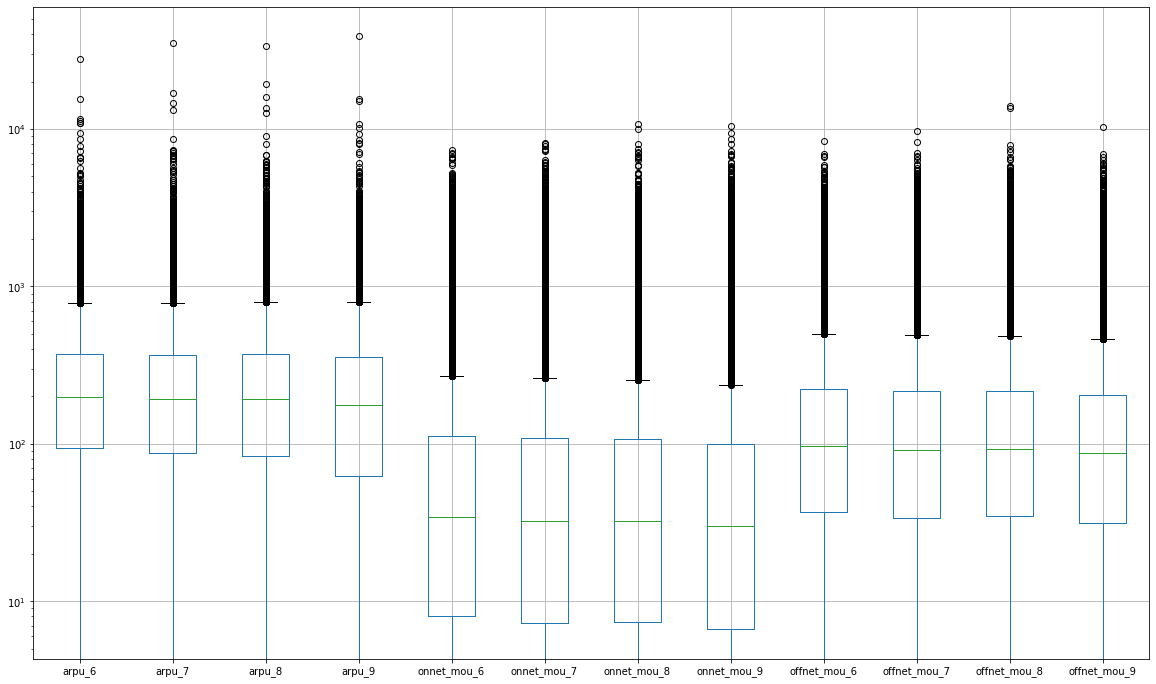

In [26]:
plt.figure(figsize=(20, 12))
df[continous_var[0:12]].boxplot()
plt.yscale('log')
plt.show()

- columns containing lot of outlier values

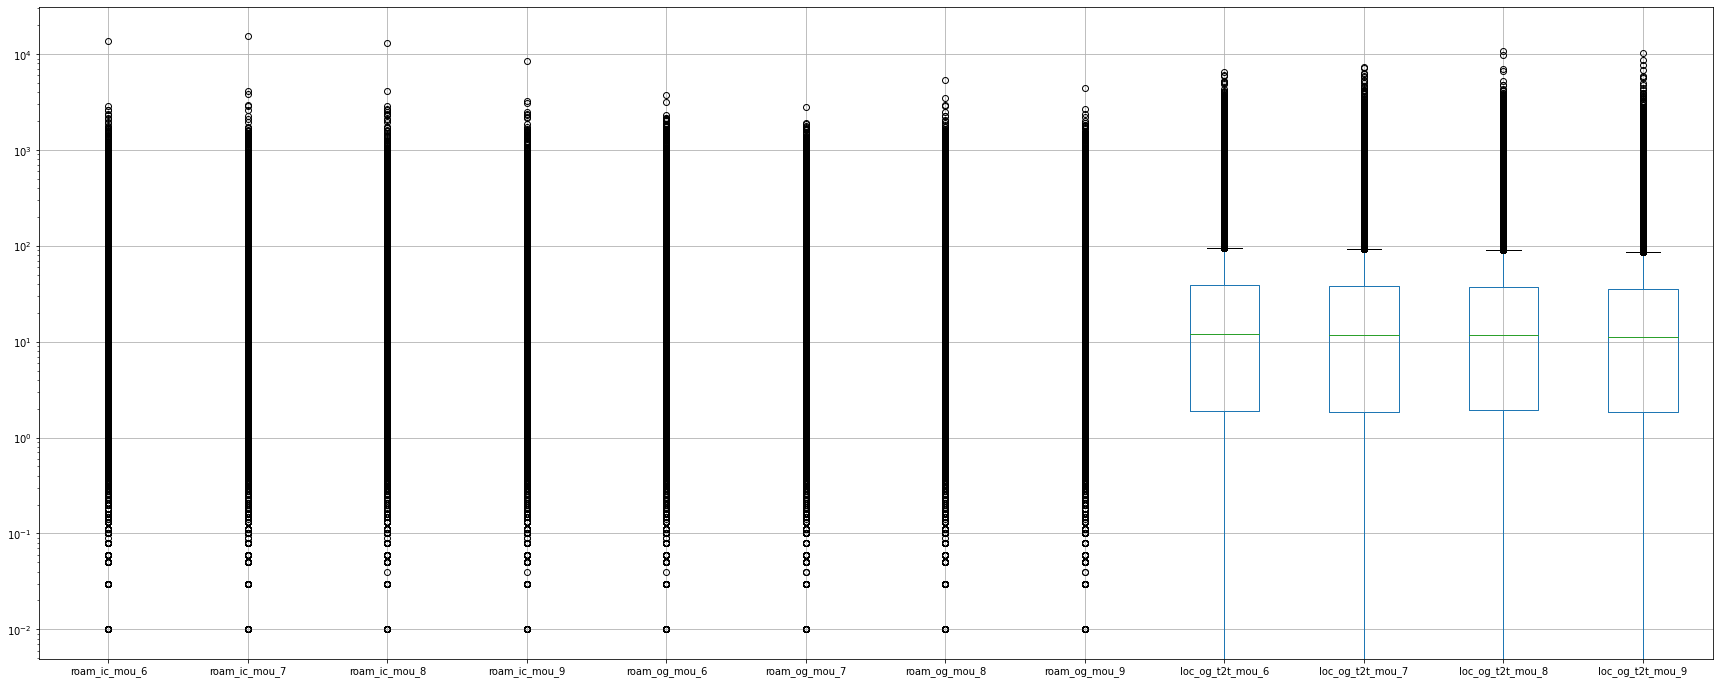

In [27]:
plt.figure(figsize=(30, 12))
df[continous_var[12:24]].boxplot()
plt.yscale('log')
plt.show()

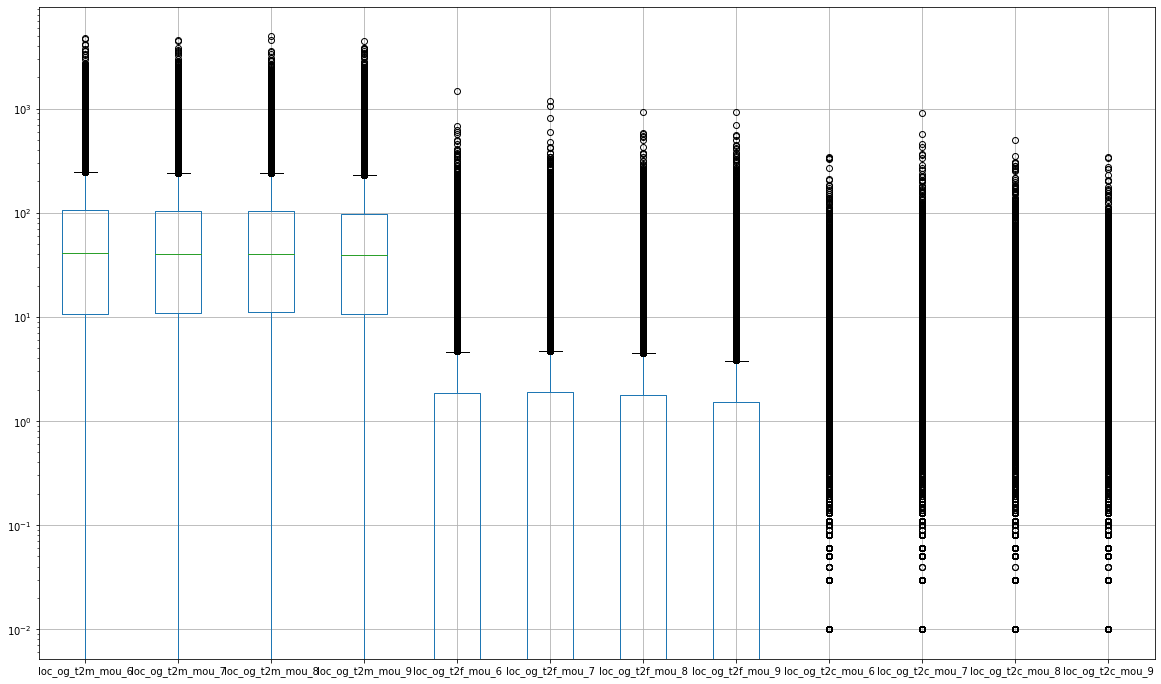

In [28]:
plt.figure(figsize=(20, 12))
df[continous_var[24:36]].boxplot()
plt.yscale('log')
plt.show()

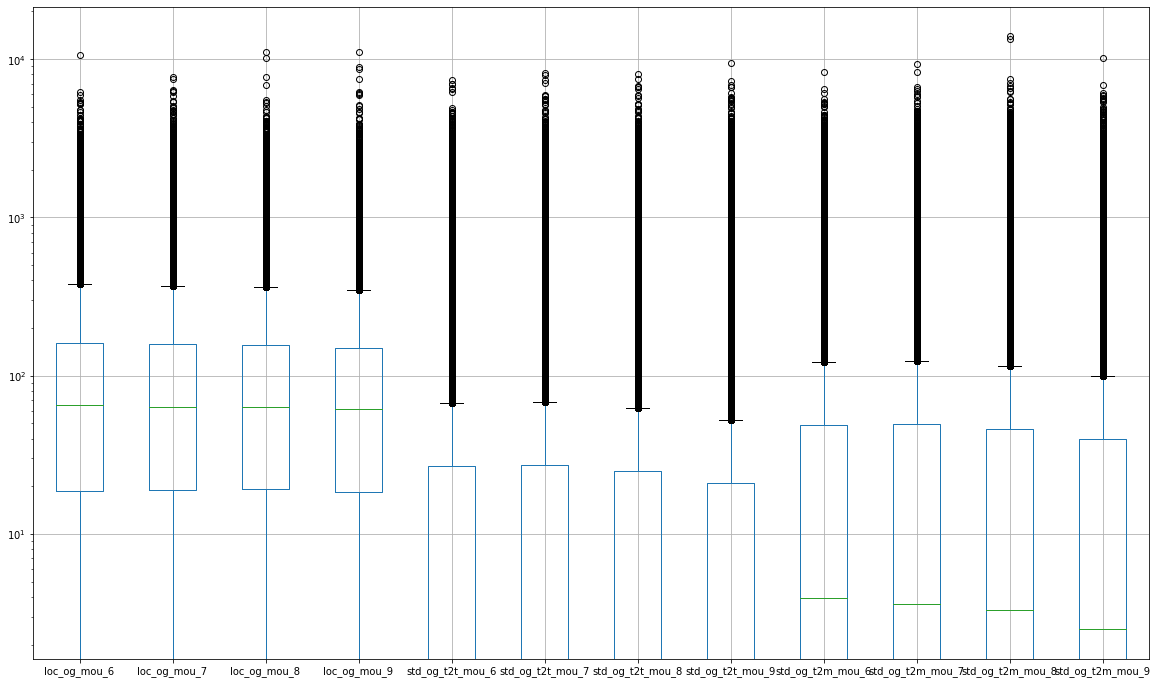

In [29]:
plt.figure(figsize=(20, 12))
df[continous_var[36:48]].boxplot()
plt.yscale('log')
plt.show()

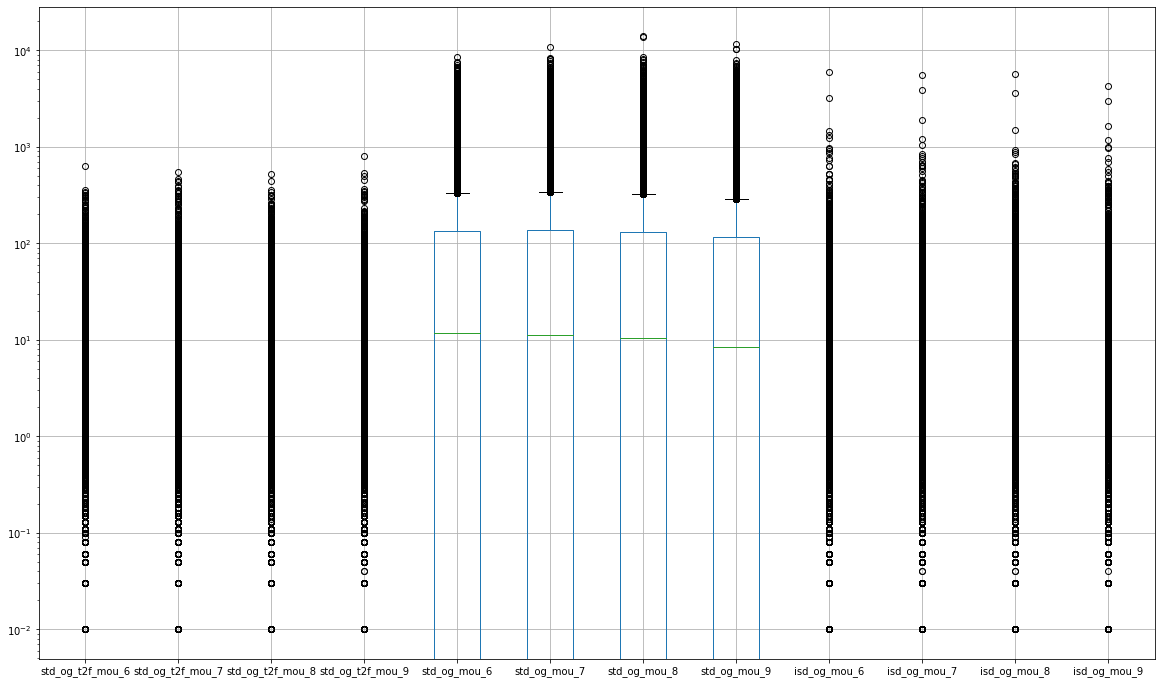

In [30]:
plt.figure(figsize=(20, 12))
df[continous_var[48:60]].boxplot()
plt.yscale('log')
plt.show()

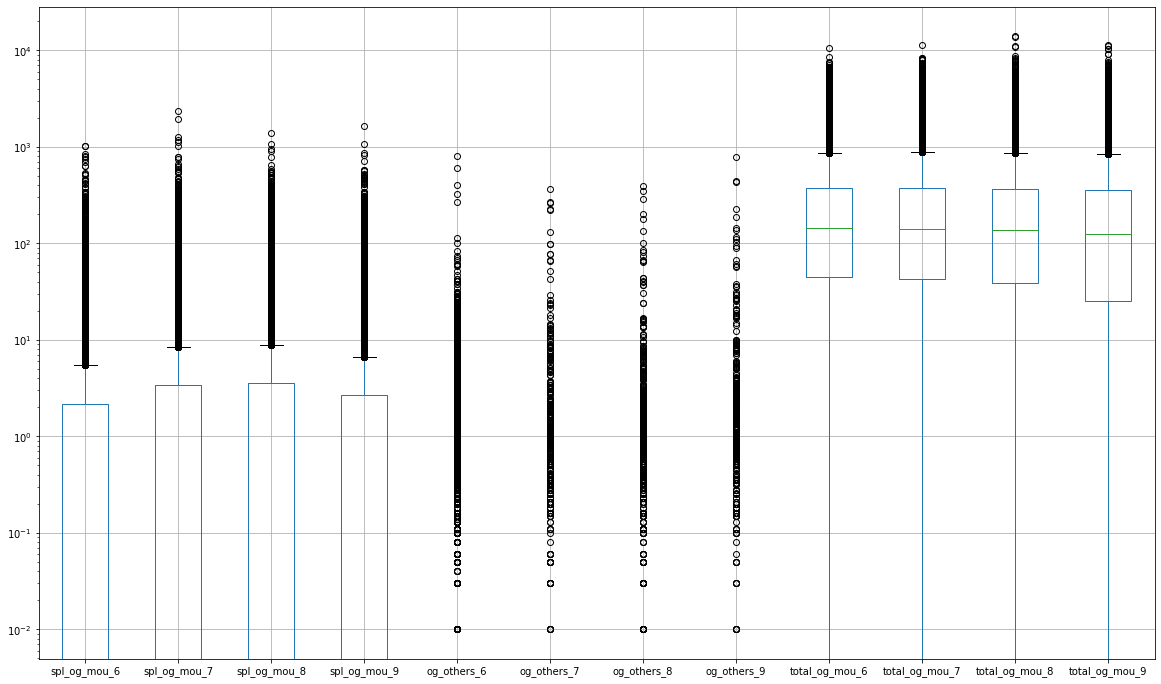

In [31]:
plt.figure(figsize=(20, 12))
df[continous_var[60:72]].boxplot()
plt.yscale('log')
plt.show()

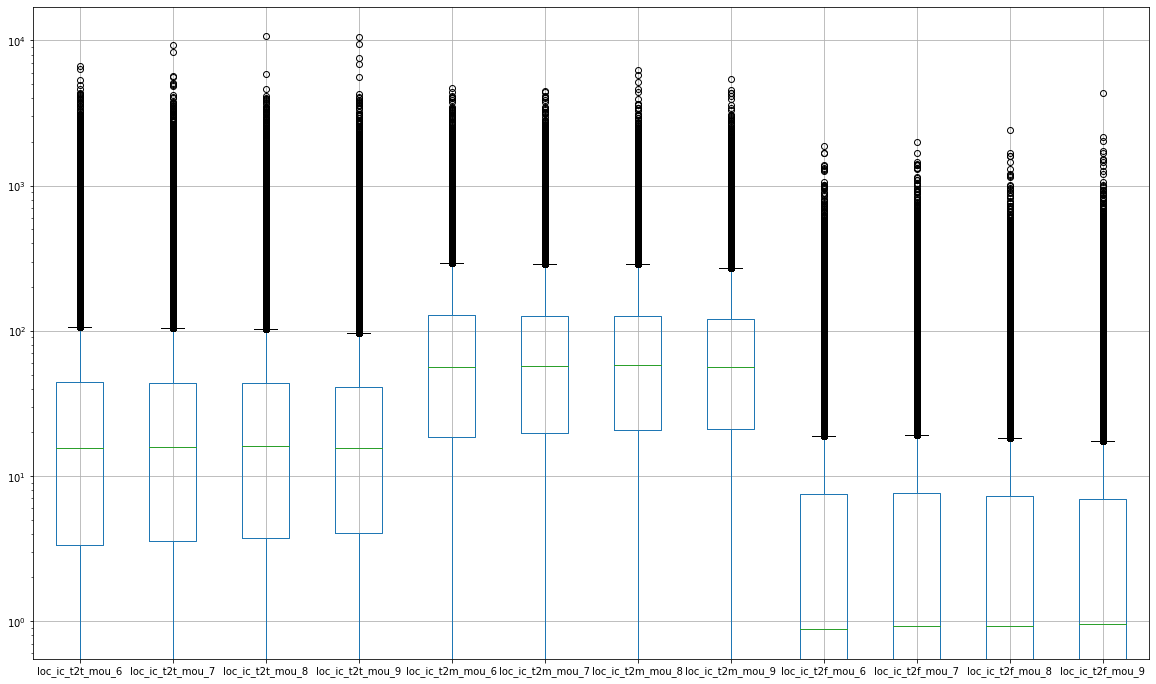

In [32]:
plt.figure(figsize=(20, 12))
df[continous_var[72:84]].boxplot()
plt.yscale('log')
plt.show()

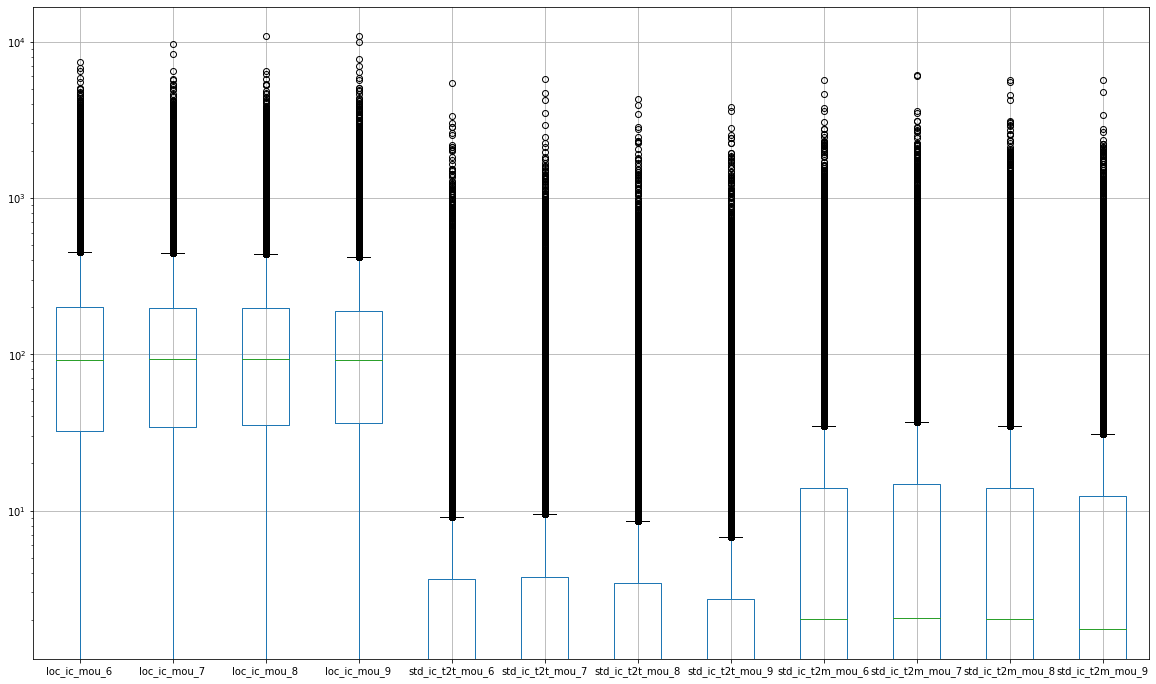

In [33]:
plt.figure(figsize=(20, 12))
df[continous_var[84:96]].boxplot()
plt.yscale('log')
plt.show()

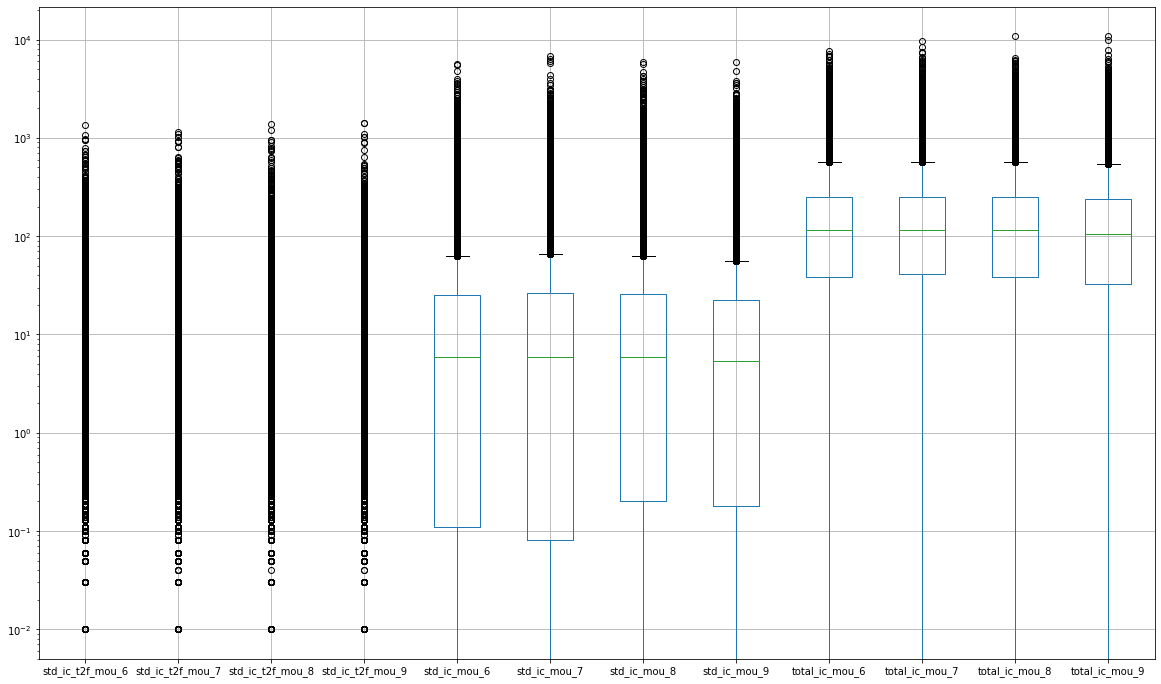

In [34]:
plt.figure(figsize=(20, 12))
df[continous_var[96:108]].boxplot()
plt.yscale('log')
plt.show()

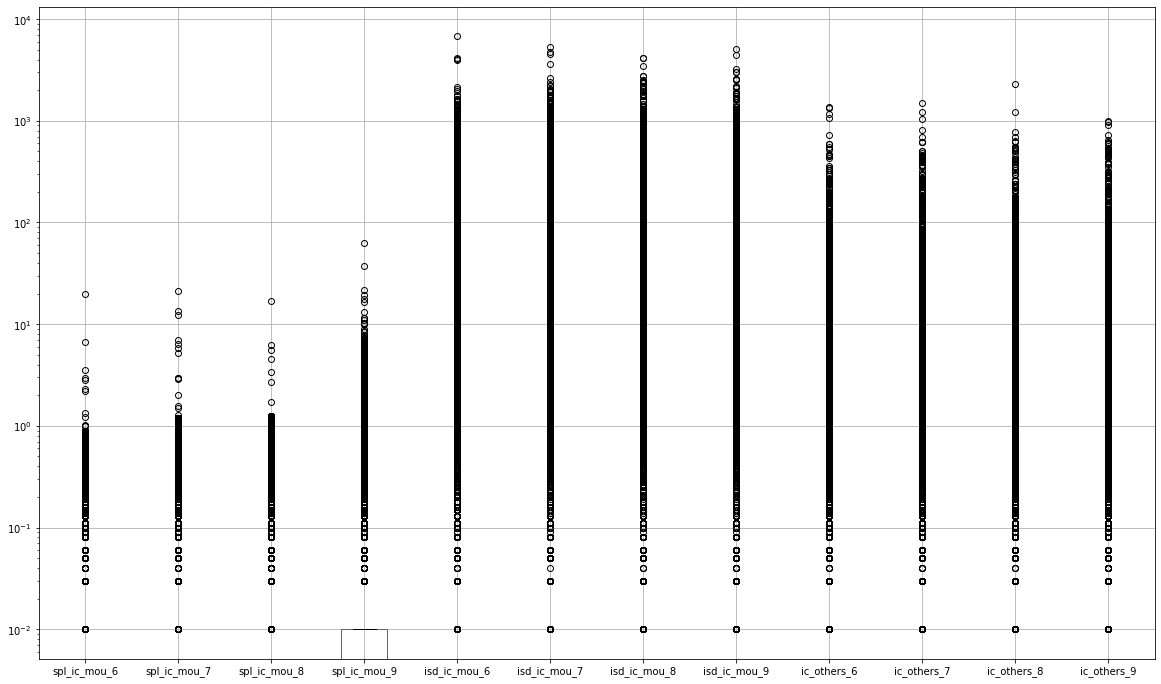

In [35]:
plt.figure(figsize=(20, 12))
df[continous_var[108:120]].boxplot()
plt.yscale('log')
plt.show()

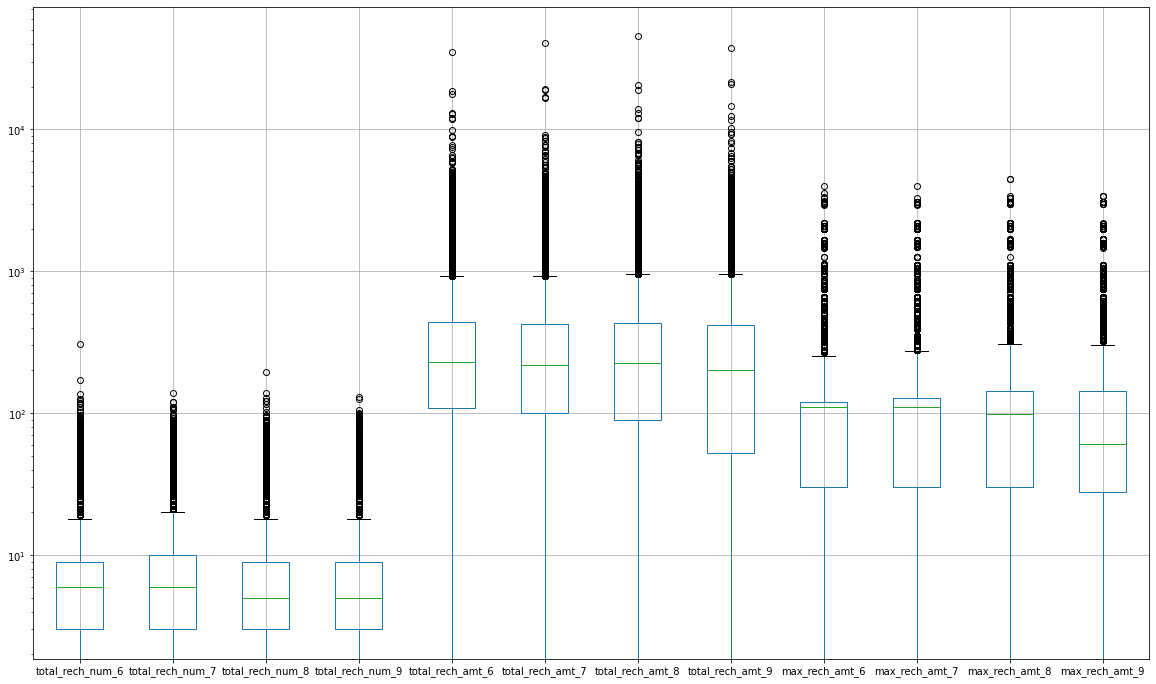

In [36]:
plt.figure(figsize=(20, 12))
df[continous_var[120:132]].boxplot()
plt.yscale('log')
plt.show()

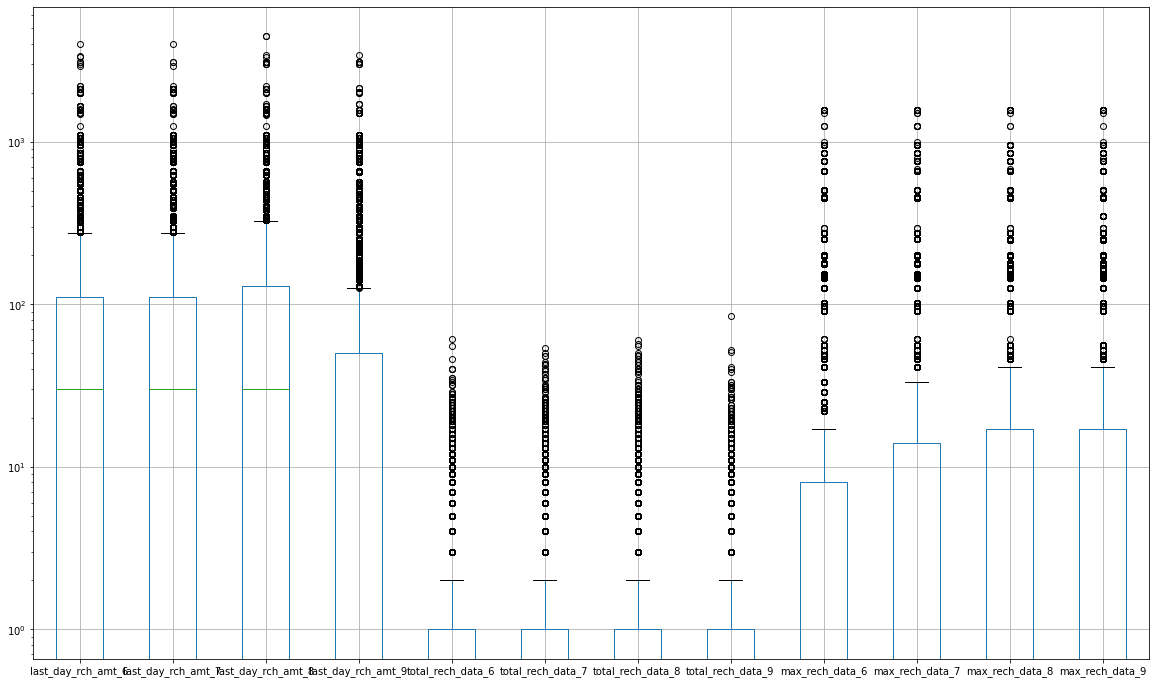

In [37]:
plt.figure(figsize=(20, 12))
df[continous_var[132:144]].boxplot()
plt.yscale('log')
plt.show()

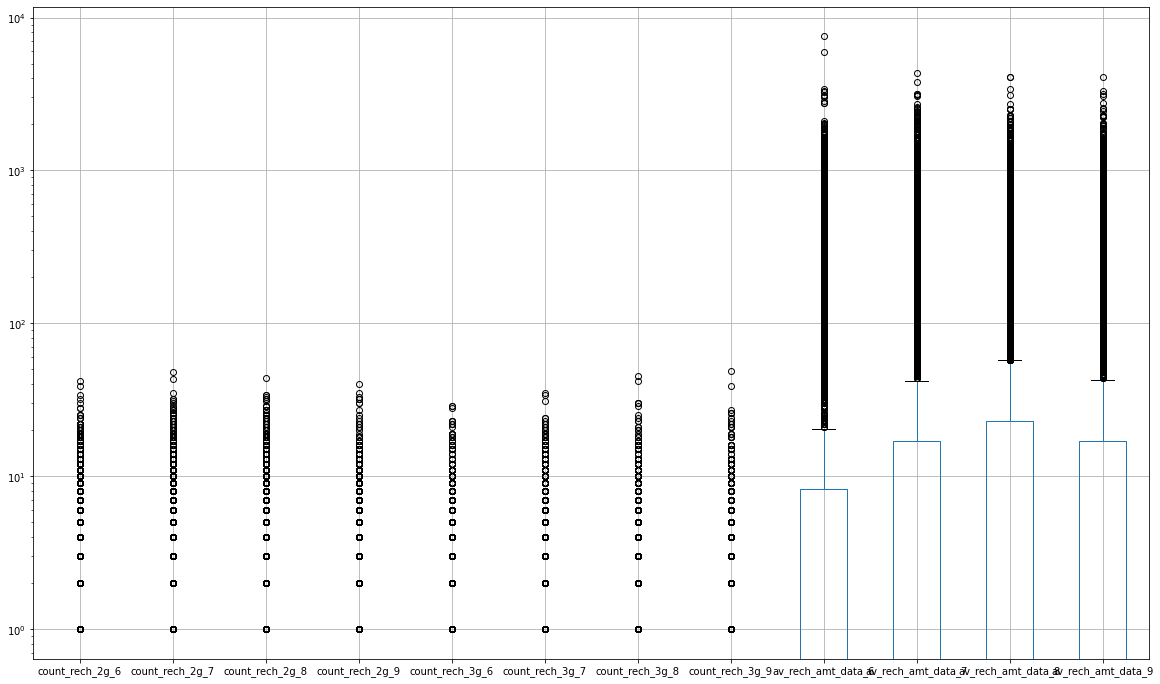

In [38]:
plt.figure(figsize=(20, 12))
df[continous_var[144:156]].boxplot()
plt.yscale('log')
plt.show()

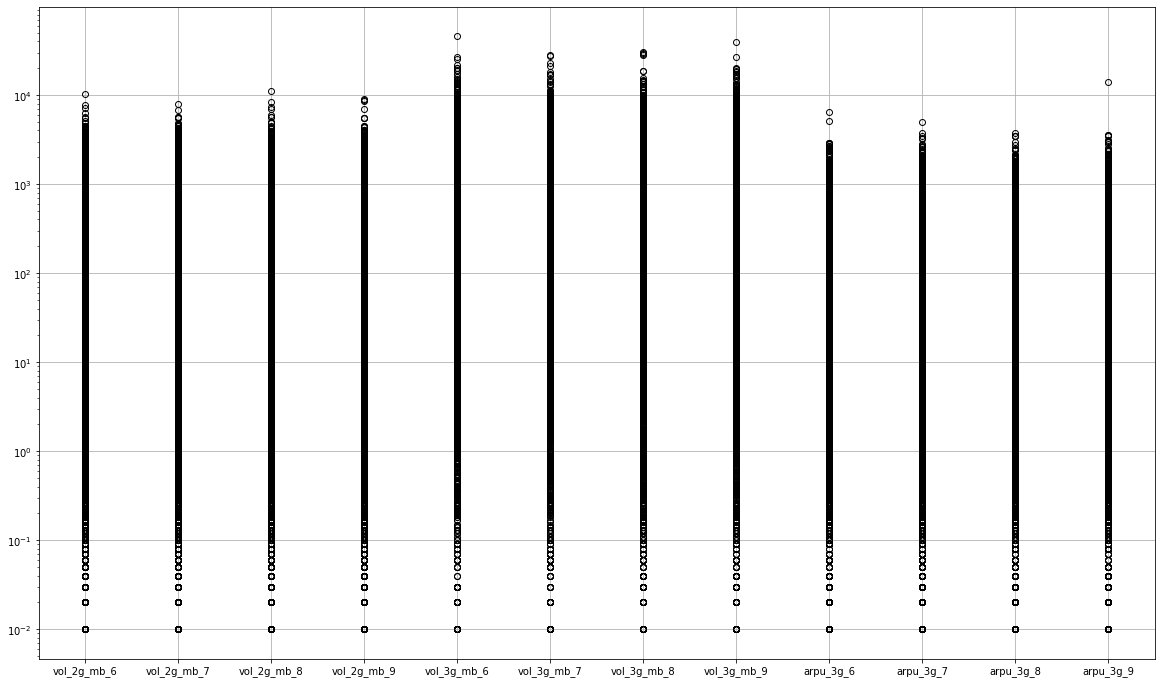

In [39]:
plt.figure(figsize=(20, 12))
df[continous_var[156:168]].boxplot()
plt.yscale('log')
plt.show()

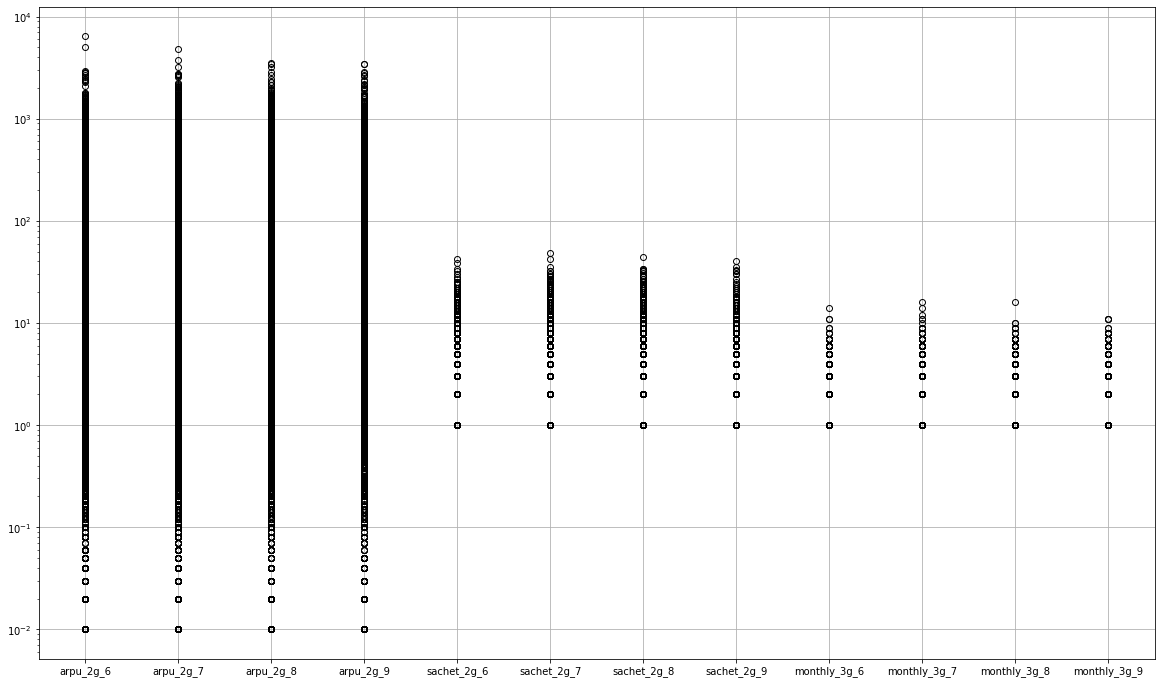

In [40]:
plt.figure(figsize=(20, 12))
df[continous_var[168:180]].boxplot()
plt.yscale('log')
plt.show()

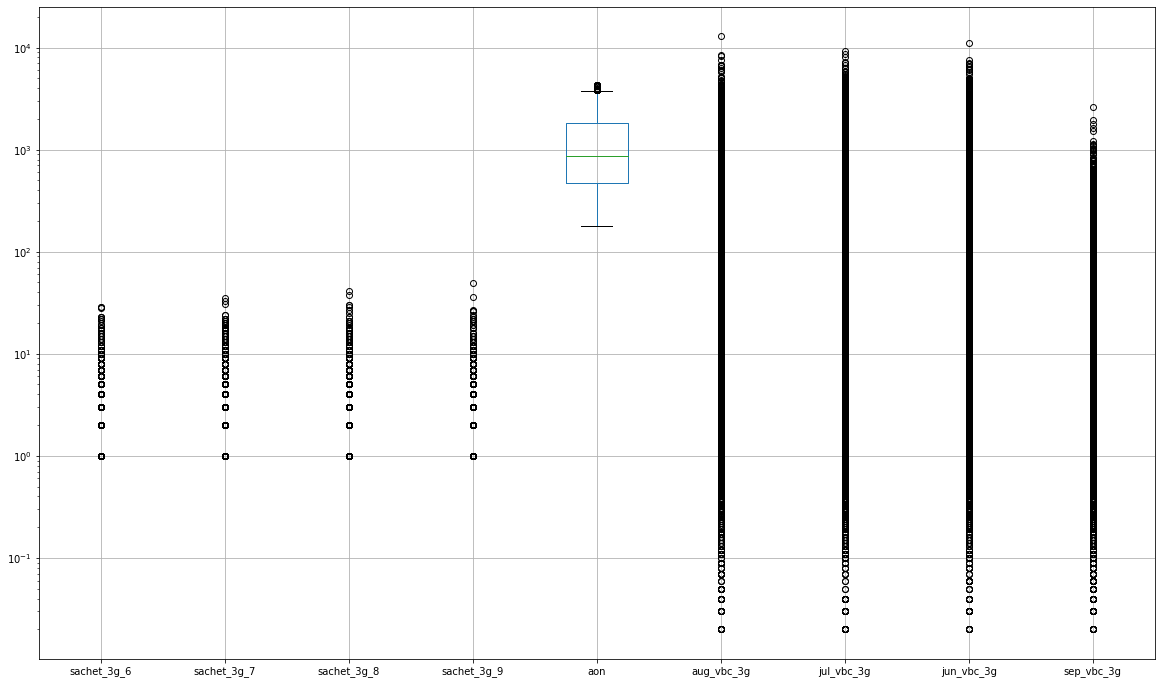

In [41]:
plt.figure(figsize=(20, 12))
df[continous_var[180:190]].boxplot()
plt.yscale('log')
plt.show()

In [42]:
categorical_var=[]

categorical_var=[var for var in df.columns
                   if (df[var].nunique()<=8) ]
print(categorical_var)
print(len(categorical_var))

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
24


<Figure size 1440x864 with 0 Axes>

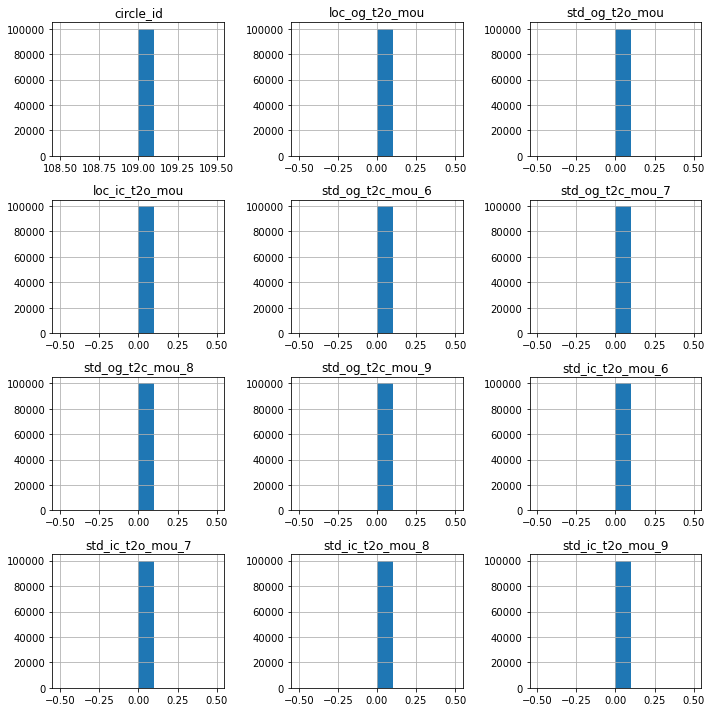

In [43]:
plt.figure(figsize=(20, 12))
df[categorical_var[0:12]].hist(figsize=(10, 10))
#plt.yscale('log')
plt.tight_layout()
plt.show()

- These are the categorical variable with one singe value, we can remove these

<Figure size 1440x864 with 0 Axes>

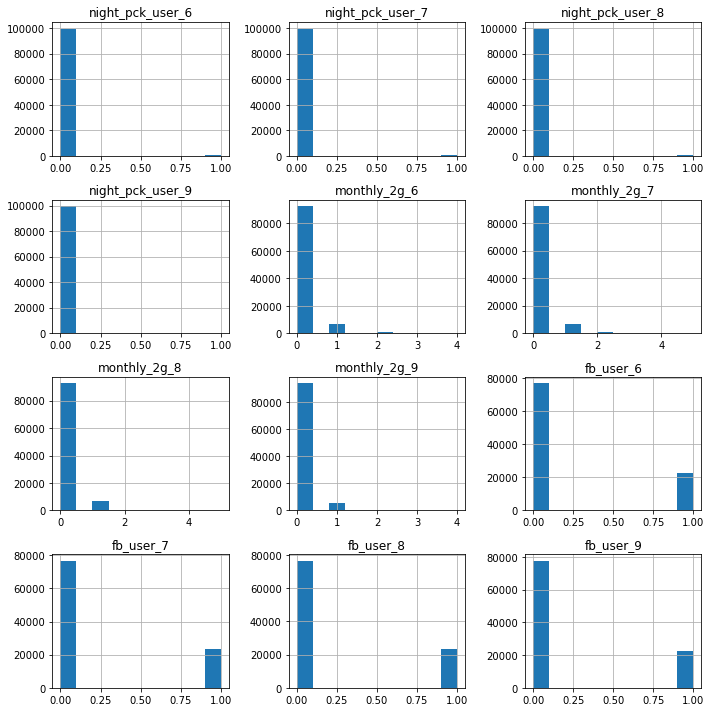

In [44]:
plt.figure(figsize=(20, 12))
df[categorical_var[12:24]].hist(figsize=(10, 10))
#plt.yscale('log')
plt.tight_layout()
plt.show()

As we can see there are many columns which have single unique value or do not add any value for us.  
There are also multiple columns where the data is extremely skewed. We will deal with those columns during data preparation.  

Let's also derive churn here so that we can do bivariate analysis with one variable as churn to see how other variables behave w.r.t churn

## Derive Churn

In [45]:
#Assign 0 for churn, 1 for no churn
df['Churn']=df['total_ic_mou_9'] + df['total_og_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']
df['Churn']=df['Churn'].apply(lambda x: 1 if x>0 else 0)

In [46]:
# remove 9th columns data as now it is already used to define churn
#list of all date columns
list_of_9thmon_columns=[col for col in df.columns
                          if "9" in col]
list_of_9thmon_columns

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [47]:
#drop all list_of_9thmon_columns columns
df.drop(list_of_9thmon_columns,inplace=True,axis=1)
df.shape

(99999, 163)

In [48]:
df['Churn'].value_counts()

1    89808
0    10191
Name: Churn, dtype: int64

In [49]:
df['Churn'].value_counts()[0]/df['Churn'].value_counts()[1]*100

11.347541421699626

Class imbalance is there 

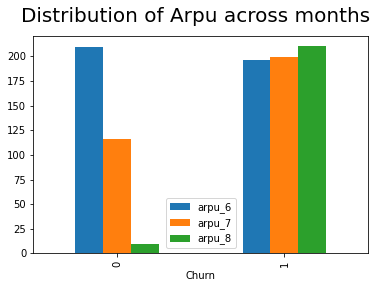

In [395]:
df['Churn'] = df['Churn'].astype('object', copy = False)
df_sample = df.groupby(['Churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

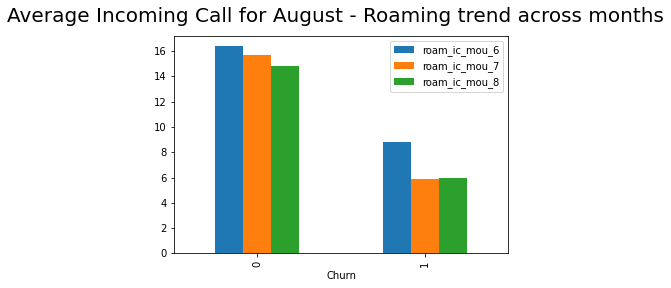

In [396]:
df_sample = df.groupby(['Churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

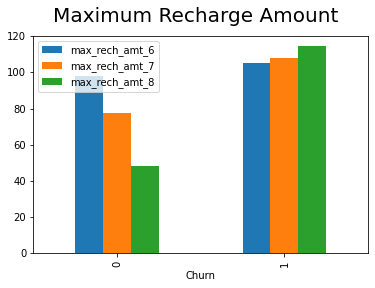

In [397]:
df_sample = df.groupby(['Churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()

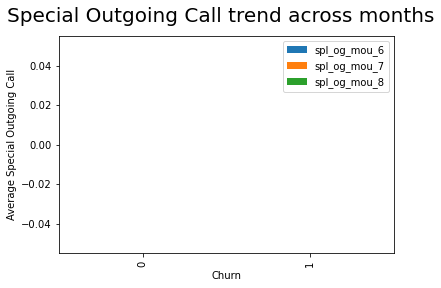

In [398]:
df_sample = df.groupby(['Churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()

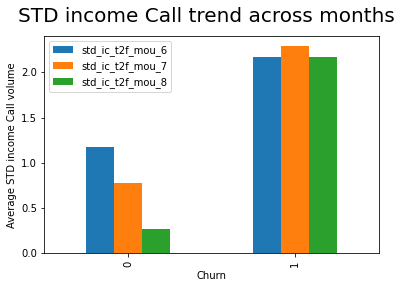

In [399]:
df_sample = df.groupby(['Churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()

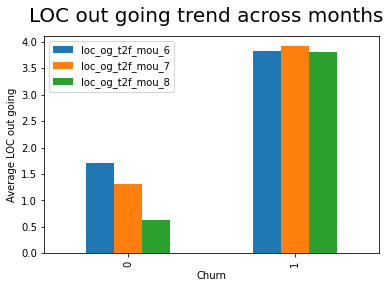

In [400]:
df_sample = df.groupby(['Churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

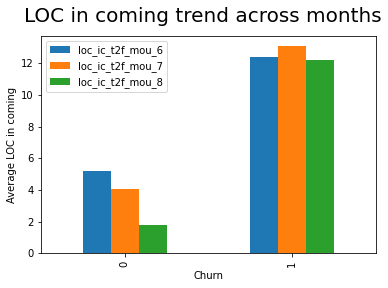

In [401]:
df_sample = df.groupby(['Churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()

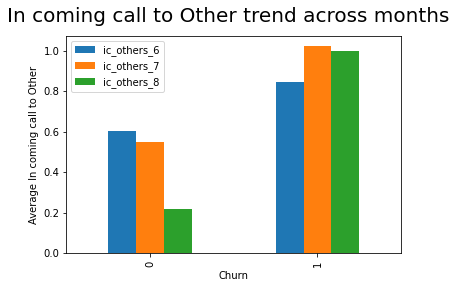

In [402]:
df_sample = df.groupby(['Churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

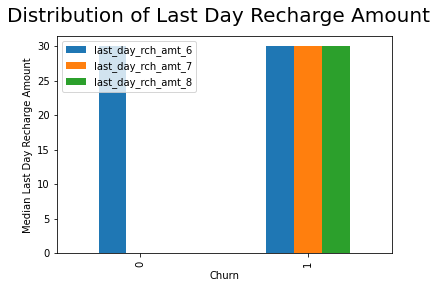

In [394]:
df['Churn'] = df['Churn'].astype('object', copy = False)
df_sample = df.groupby(['Churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

In [50]:
def boxplotme(col,scale):
    plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.boxplot(x=df['Churn'], y=df[col])
    mybox1 = ax.artists[0]
    mybox2 = ax.artists[1]
    mybox1.set_facecolor('red')
    mybox2.set_facecolor('green')
    plt.yscale(scale)
    return plt.show()

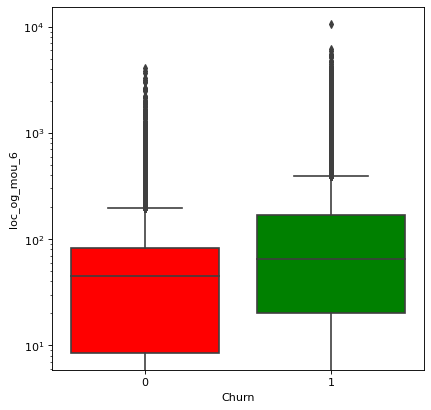

In [51]:
boxplotme('loc_og_mou_6','log')

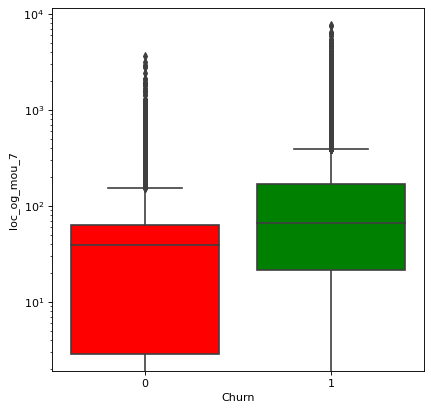

In [52]:
boxplotme('loc_og_mou_7','log')

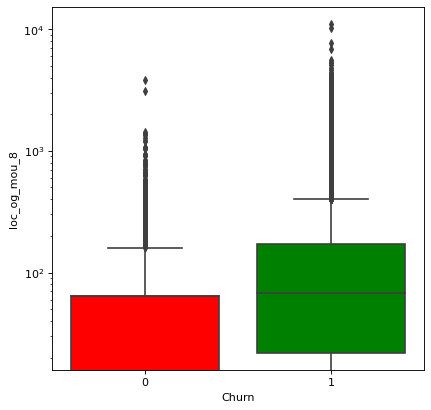

In [53]:
boxplotme('loc_og_mou_8','log')

As expected we can see that for churn customers the mou is less than for non churn customers.

## Finding High value customer

In [54]:
#in good phase
df['total_rech_amt']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [55]:
df[["total_rech_amt","total_rech_amt_6","total_rech_amt_7"]].sample(n=7)

,total_rech_amt,total_rech_amt_6,total_rech_amt_7
mobile_number,,,
7000863357,263.00,220,306
7001265103,165.00,330,0
7000494554,20.00,0,40
7000024782,167.50,146,189
7000494621,172.50,70,275
7000020559,168.00,102,234
7002253533,173.00,146,200


 look for 70th percentile value, retain only values which are more than 70 percentile

In [56]:
df["total_rech_amt"].describe(percentiles=[0.7])

count   99999.00
mean      325.24
std       370.83
min         0.00
50%       229.00
70%       368.50
max     37762.50
Name: total_rech_amt, dtype: float64

In [57]:
df["total_rech_amt"].quantile(0.7)

368.5

In [58]:
prev_df=df.copy()

In [59]:
HVC=df[df["total_rech_amt"]>df["total_rech_amt"].quantile(0.7)]

HVC.shape

(29979, 164)

In [60]:
HVC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7000701601 to 7000498689
Columns: 164 entries, circle_id to total_rech_amt
dtypes: float64(137), int64(27)
memory usage: 37.7 MB


# Derived Columns

### Group good phase columns

Let's add _gp for good phase (6,7) and month 8 will be action phase as we know.

In [61]:

HVC['fb_user_gp']=(HVC['fb_user_6']+HVC['fb_user_7'])
HVC['fb_user_gp'].value_counts()
HVC.drop(['fb_user_6','fb_user_7'],inplace=True,axis=1)

HVC['arpu_3g_gp']=(HVC['arpu_3g_6']+HVC['arpu_3g_7'])/2
HVC.drop(['arpu_3g_6','arpu_3g_7'],inplace=True,axis=1)

HVC['arpu_2g_gp']=(HVC['arpu_2g_6']+HVC['arpu_2g_7'])/2
HVC.drop(['arpu_2g_6','arpu_2g_7'],inplace=True,axis=1)

HVC['arpu_gp']=(HVC['arpu_6']+HVC['arpu_7'])/2

In [62]:
# based on avg revenue, derive state of customer 
# i.e. check difference between 6th month and 8th month recharge
#  Highly Probable to churn     -> -2 -> if  arpu_8 < arpu_6-arpu_6*10% 
#  Probable to churn            -> -1 -> if arpu_6-arpu_6*10% < arpu_8 < arpu_6-arpu_6*5%
#  OK phase                     -> 0 -> if arpu_6-arpu_6*5% < arpu_8   < arpu_6+arpu_6*5%
#  good phase                   -> 1 -> if arpu_6+arpu_6*5% < arpu_8 < arpu_6+arpu_6*10%
#  very good phase              -> 2 -> if arpu_6+arpu_6*10% < arpu_8

def arpuFn(x):
    tenprecentval=x[0]*0.1
    fiveprecentval=x[0]*0.05
    if  x[0] < x[0]-tenprecentval:
        return -2
    elif x[0] < x[1]-fiveprecentval:
        return -1
    elif x[0] < x[1]+fiveprecentval:
        return 0
    if  x[0] < x[0]+tenprecentval:
        return 1
    else:
        return 2
    
HVC['arpu Analysis']=HVC[["arpu_6","arpu_8"]].apply(arpuFn,axis=1)

HVC[["arpu_6","arpu_8","arpu Analysis"]].head()

,arpu_6,arpu_8,arpu Analysis
mobile_number,,,
7000701601,1069.18,3171.48,-1
7001524846,378.72,137.36,1
7002191713,492.85,593.26,-1
7000875565,430.98,187.89,1
7000187447,690.01,25.50,1


In [63]:
HVC['arpu Analysis'].value_counts()
HVC.drop(['arpu_6','arpu_7'],inplace=True,axis=1)

In [64]:
HVC_by_arpuAnalysis = HVC.groupby(['arpu Analysis','Churn']).agg({'Churn': 'count'})
HVC_by_arpuAnalysis_percent = HVC_by_arpuAnalysis.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
HVC_by_arpuAnalysis_percent

Churn
arpu Analysis Churn       
-2            0      23.53
              1      76.47
-1            0       3.47
              1      96.53
 0            0       2.45
              1      97.55
 1            0      13.36
              1      86.64
 2            0      45.45
              1      54.55

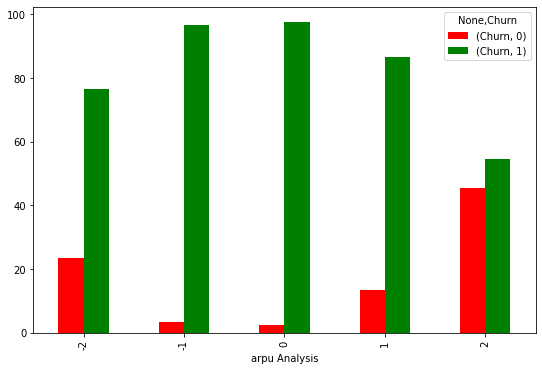

In [65]:
HVC_by_arpuAnalysis_percent.unstack().plot(kind='bar',figsize=(9,6),color=('r','g'))
plt.yscale('linear')
plt.show()

In [66]:
HVC['onnet_mou_gp']=(HVC['onnet_mou_6']+HVC['onnet_mou_7'])/2
HVC.drop(['onnet_mou_6','onnet_mou_7'],inplace=True,axis=1)

HVC['offnet_mou_gp']=(HVC['offnet_mou_6']+HVC['offnet_mou_7'])/2
HVC.drop(['offnet_mou_6','offnet_mou_7'],inplace=True,axis=1)

HVC['roam_ic_mou_gp']=(HVC['roam_ic_mou_6']+HVC['roam_ic_mou_7'])/2
HVC.drop(['roam_ic_mou_6','roam_ic_mou_7'],inplace=True,axis=1)

HVC['roam_og_mou_gp']=(HVC['roam_og_mou_6']+HVC['roam_og_mou_7'])/2
HVC.drop(['roam_og_mou_6','roam_og_mou_7'],inplace=True,axis=1)

HVC['loc_og_t2t_mou_gp']=(HVC['loc_og_t2t_mou_6']+HVC['loc_og_t2t_mou_7'])/2
HVC.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7'],inplace=True,axis=1)

HVC['loc_og_t2m_mou_gp']=(HVC['loc_og_t2m_mou_6']+HVC['loc_og_t2m_mou_7'])/2
HVC.drop(['loc_og_t2m_mou_6','loc_og_t2m_mou_7'],inplace=True,axis=1)

HVC['loc_og_t2f_mou_gp']=(HVC['loc_og_t2f_mou_6']+HVC['loc_og_t2f_mou_7'])/2
HVC.drop(['loc_og_t2f_mou_6','loc_og_t2f_mou_7'],inplace=True,axis=1)

HVC['loc_og_t2c_mou_gp']=(HVC['loc_og_t2c_mou_6']+HVC['loc_og_t2c_mou_7'])/2
HVC.drop(['loc_og_t2c_mou_6','loc_og_t2c_mou_7'],inplace=True,axis=1)

In [67]:
#loc_og_mou_6, loc_og_mou_7, loc_og_mou_8 are just the sum of outgoing mou from respective months. We can drop them.
HVC.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],inplace=True,axis=1)

HVC['std_og_t2t_mou_gp']=(HVC['std_og_t2t_mou_6']+HVC['std_og_t2t_mou_7'])/2
HVC.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7'],inplace=True,axis=1)

HVC['std_og_t2m_mou_gp']=(HVC['std_og_t2m_mou_6']+HVC['std_og_t2m_mou_7'])/2
HVC.drop(['std_og_t2m_mou_6','std_og_t2m_mou_7'],inplace=True,axis=1)

HVC['std_og_t2f_mou_gp']=(HVC['std_og_t2f_mou_6']+HVC['std_og_t2f_mou_7'])/2
HVC.drop(['std_og_t2f_mou_6','std_og_t2f_mou_7'],inplace=True,axis=1)

In [68]:
#std_og_mou_6, std_og_mou_7, std_og_mou_8 are just the sum of outgoing mou from respective months. We can drop them.
HVC.drop(['std_og_mou_6','std_og_mou_7','std_og_mou_8'],inplace=True,axis=1)

HVC['isd_og_mou_gp']=(HVC['isd_og_mou_6']+HVC['isd_og_mou_7'])/2
HVC.drop(['isd_og_mou_6','isd_og_mou_7'],inplace=True,axis=1)

HVC['spl_og_mou_gp']=(HVC['spl_og_mou_6']+HVC['spl_og_mou_7'])/2
HVC.drop(['spl_og_mou_6','spl_og_mou_7'],inplace=True,axis=1)

HVC['og_others_6'].value_counts()/len(HVC)*100

HVC['total_og_mou_gp']=(HVC['total_og_mou_6']+HVC['total_og_mou_7'])/2
HVC.drop(['total_og_mou_6','total_og_mou_7'],inplace=True,axis=1)

HVC['loc_ic_t2t_mou_gp']=(HVC['loc_ic_t2t_mou_6']+HVC['loc_ic_t2t_mou_7'])/2
HVC.drop(['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7'],inplace=True,axis=1)

HVC['loc_ic_t2m_mou_gp']=(HVC['loc_ic_t2m_mou_6']+HVC['loc_ic_t2m_mou_7'])/2
HVC.drop(['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7'],inplace=True,axis=1)

HVC['loc_ic_t2f_mou_gp']=(HVC['loc_ic_t2f_mou_6']+HVC['loc_ic_t2f_mou_7'])/2
HVC.drop(['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7'],inplace=True,axis=1)

In [69]:
#loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8 are just the sum of outgoing mou from respective months. We can drop them.
HVC.drop(['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8'],inplace=True,axis=1)

HVC['std_ic_t2t_mou_gp']=(HVC['std_ic_t2t_mou_6']+HVC['std_ic_t2t_mou_7'])/2
HVC.drop(['std_ic_t2t_mou_6','std_ic_t2t_mou_7'],inplace=True,axis=1)

HVC['std_ic_t2m_mou_gp']=(HVC['std_ic_t2m_mou_6']+HVC['std_ic_t2m_mou_7'])/2
HVC.drop(['std_ic_t2m_mou_6','std_ic_t2m_mou_7'],inplace=True,axis=1)

HVC['std_ic_t2f_mou_gp']=(HVC['std_ic_t2f_mou_6']+HVC['std_ic_t2f_mou_7'])/2
HVC.drop(['std_ic_t2f_mou_6','std_ic_t2f_mou_7'],inplace=True,axis=1)

In [70]:
#std_ic_mou_6, std_ic_mou_7, std_ic_mou_8 are just the sum of outgoing mou from respective months. We can drop them.
HVC.drop(['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8'],inplace=True,axis=1)

In [71]:
#total_ic_mou_6, total_ic_mou_7, total_ic_mou_8 are just the sum of outgoing mou from respective months.
#We can drop them.
HVC.drop(['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'],inplace=True,axis=1)

HVC['spl_ic_mou_gp']=(HVC['spl_ic_mou_6']+HVC['spl_ic_mou_7'])/2
HVC.drop(['spl_ic_mou_6','spl_ic_mou_7'],inplace=True,axis=1)

HVC['isd_ic_mou_gp']=(HVC['isd_ic_mou_6']+HVC['isd_ic_mou_7'])/2
HVC.drop(['isd_ic_mou_6','isd_ic_mou_7'],inplace=True,axis=1)

HVC['ic_others_gp']=(HVC['ic_others_6']+HVC['ic_others_7'])/2
HVC.drop(['ic_others_6','ic_others_7'],inplace=True,axis=1)

HVC['total_rech_num_gp']=(HVC['total_rech_num_6']+HVC['total_rech_num_7'])/2
HVC.drop(['total_rech_num_6','total_rech_num_7'],inplace=True,axis=1)

HVC['total_rech_amt_gp']=(HVC['total_rech_amt_6']+HVC['total_rech_amt_7'])/2
HVC.drop(['total_rech_amt_6','total_rech_amt_7'],inplace=True,axis=1)

HVC['max_rech_amt_gp']=(HVC['max_rech_amt_6']+HVC['max_rech_amt_7'])/2
HVC.drop(['max_rech_amt_6','max_rech_amt_7'],inplace=True,axis=1)

HVC['last_day_rch_amt_gp']=(HVC['last_day_rch_amt_6']+HVC['last_day_rch_amt_7'])/2
HVC.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],inplace=True,axis=1)

HVC['total_rech_data_gp']=(HVC['total_rech_data_6']+HVC['total_rech_data_7'])/2
HVC.drop(['total_rech_data_6','total_rech_data_7'],inplace=True,axis=1)

In [72]:
HVC['max_rech_data_gp']=(HVC['max_rech_data_6']+HVC['max_rech_data_7'])/2
HVC.drop(['max_rech_data_6','max_rech_data_7'],inplace=True,axis=1)

HVC['count_rech_2g_gp']=(HVC['count_rech_2g_6']+HVC['count_rech_2g_7'])
HVC.drop(['count_rech_2g_6','count_rech_2g_7'],inplace=True,axis=1)

HVC['count_rech_3g_gp']=(HVC['count_rech_3g_6']+HVC['count_rech_3g_7'])
HVC.drop(['count_rech_3g_6','count_rech_3g_7'],inplace=True,axis=1)

HVC['av_rech_amt_data_gp']=(HVC['av_rech_amt_data_6']+HVC['av_rech_amt_data_7'])/2
HVC.drop(['av_rech_amt_data_6','av_rech_amt_data_7'],inplace=True,axis=1)

HVC['vol_2g_mb_gp']=(HVC['vol_2g_mb_6']+HVC['vol_2g_mb_7'])/2
HVC.drop(['vol_2g_mb_6','vol_2g_mb_7'],inplace=True,axis=1)

HVC['vol_3g_mb_gp']=(HVC['vol_3g_mb_6']+HVC['vol_3g_mb_7'])/2
HVC.drop(['vol_3g_mb_6','vol_3g_mb_7'],inplace=True,axis=1)

HVC['monthly_2g_gp']=(HVC['monthly_2g_6']+HVC['monthly_2g_7'])/2
HVC.drop(['monthly_2g_6','monthly_2g_7'],inplace=True,axis=1)

HVC['sachet_2g_gp']=(HVC['sachet_2g_6']+HVC['sachet_2g_7'])/2
HVC.drop(['sachet_2g_6','sachet_2g_7'],inplace=True,axis=1)

HVC['monthly_3g_gp']=(HVC['monthly_3g_6']+HVC['monthly_3g_7'])/2
HVC.drop(['monthly_3g_6','monthly_3g_7'],inplace=True,axis=1)

HVC['sachet_3g_gp']=(HVC['sachet_3g_6']+HVC['sachet_3g_7'])
HVC.drop(['sachet_3g_6','sachet_3g_7'],inplace=True,axis=1)

In [73]:
#Sep data should not be used for churn analysis and we can drop that as well.
HVC['vbc_3g_gp']=(HVC['jun_vbc_3g']+HVC['jul_vbc_3g'])/2
HVC.drop(['jun_vbc_3g','jul_vbc_3g','sep_vbc_3g'],inplace=True,axis=1)

In [74]:
#circle_id has only 1 unique value and doesn't add any useful information. Let's go ahead and drop it.
HVC.drop(['circle_id'],inplace=True,axis=1)

# Data Preparation  

In [75]:
HVC.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,Churn,total_rech_amt,fb_user_gp,arpu_3g_gp,arpu_2g_gp,arpu_gp,arpu Analysis,onnet_mou_gp,offnet_mou_gp,roam_ic_mou_gp,roam_og_mou_gp,loc_og_t2t_mou_gp,loc_og_t2m_mou_gp,loc_og_t2f_mou_gp,loc_og_t2c_mou_gp,std_og_t2t_mou_gp,std_og_t2m_mou_gp,std_og_t2f_mou_gp,isd_og_mou_gp,spl_og_mou_gp,total_og_mou_gp,loc_ic_t2t_mou_gp,loc_ic_t2m_mou_gp,loc_ic_t2f_mou_gp,std_ic_t2t_mou_gp,std_ic_t2m_mou_gp,std_ic_t2f_mou_gp,spl_ic_mou_gp,isd_ic_mou_gp,ic_others_gp,total_rech_num_gp,total_rech_amt_gp,max_rech_amt_gp,last_day_rch_amt_gp,total_rech_data_gp,max_rech_data_gp,count_rech_2g_gp,count_rech_3g_gp,av_rech_amt_data_gp,vol_2g_mb_gp,vol_3g_mb_gp,monthly_2g_gp,sachet_2g_gp,monthly_3g_gp,sachet_3g_gp,vbc_3g_gp
count,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00,29979.00
mean,0.00,0.00,0.00,535.07,268.82,378.04,13.26,21.48,87.55,168.88,6.50,1.71,172.36,179.77,1.79,0.00,0.00,0.00,2.03,6.89,0.69,0.05,0.06,624.11,66.46,155.47,14.74,15.06,30.50,2.68,0.00,0.00,0.00,0.03,11.69,1.24,10.23,613.91,162.93,95.68,1.04,55.28,0.72,0.31,89.80,69.25,270.06,52.16,47.87,0.01,0.01,0.01,0.11,0.61,0.17,0.14,0.33,1264.16,129.48,0.91,697.01,0.69,54.99,51.09,588.51,0.14,300.76,422.09,15.48,25.70,95.38,181.75,7.04,1.72,194.98,208.40,2.02,2.24,6.68,698.30,69.71,160.85,16.07,16.57,32.78,2.94,0.04,11.74,1.33,12.02,697.01,173.60,104.93,1.00,57.83,1.34,0.65,94.20,78.54,268.48,0.13,0.54,0.18,0.29,128.34
std,0.00,0.00,0.00,492.45,466.20,475.66,74.59,106.29,234.71,234.10,20.23,7.40,410.21,416.88,11.71,0.00,0.00,0.00,44.82,22.90,2.28,2.74,3.32,686.21,155.58,216.00,43.72,72.47,105.31,20.28,0.00,0.00,0.00,0.12,74.92,12.89,9.48,602.05,172.67,145.32,2.41,104.81,1.87,1.16,185.89,268.62,859.72,163.91,145.87,0.10,0.10,0.10,0.36,1.84,0.58,0.98,0.47,975.18,390.63,0.28,488.93,0.88,157.20,141.01,409.12,0.95,437.00,440.28,67.40,94.78,229.29,230.69,21.51,6.71,388.87,395.38,11.89,44.81,18.36,610.55,153.92,208.49,44.61,76.28,95.21,18.81,0.15,67.16,13.40,8.73,488.93,153.55,115.12,2.13,98.64,3.39,2.07,177.57,254.27,795.34,0.34,1.67,0.54,1.71,366.28
min,0.00,0.00,0.00,-945.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [76]:
#check if columns having highly skewed data
#We are choosing 0.95 to remove highly skewed columns

def HighlySkewedColumns():
    HighlySkewedColumnslst=[]
    
    for col in HVC.columns:
        if HVC[col].value_counts().max()>len(HVC)*0.95:
            HighlySkewedColumnslst.append(col)
    return HighlySkewedColumnslst

HighlySkewedColumnslst=HighlySkewedColumns()
print(len(HighlySkewedColumnslst))
HighlySkewedColumnslst

14


['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'og_others_7',
 'og_others_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8']

In [77]:
HVC.drop(HighlySkewedColumnslst,axis=1,inplace=True)

In [78]:
HVC.shape

(29979, 91)

## Outlier treatment

In [79]:
z = np.abs(stats.zscore(HVC))

In [80]:
#zscore of 15 is about 1 percentile. Let's try to remove outliers (bottom 1% and top 1%)
HVC = HVC[(z < 15).all(axis=1)]

In [81]:
HVC.shape

(29439, 91)

We can see that we lost very few rows and treated the outliers as well!

In [82]:
HVC.sample(n=6)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,Churn,total_rech_amt,fb_user_gp,arpu_3g_gp,arpu_2g_gp,arpu_gp,arpu Analysis,onnet_mou_gp,offnet_mou_gp,roam_ic_mou_gp,roam_og_mou_gp,loc_og_t2t_mou_gp,loc_og_t2m_mou_gp,loc_og_t2f_mou_gp,loc_og_t2c_mou_gp,std_og_t2t_mou_gp,std_og_t2m_mou_gp,std_og_t2f_mou_gp,isd_og_mou_gp,spl_og_mou_gp,total_og_mou_gp,loc_ic_t2t_mou_gp,loc_ic_t2m_mou_gp,loc_ic_t2f_mou_gp,std_ic_t2t_mou_gp,std_ic_t2m_mou_gp,std_ic_t2f_mou_gp,spl_ic_mou_gp,isd_ic_mou_gp,ic_others_gp,total_rech_num_gp,total_rech_amt_gp,max_rech_amt_gp,last_day_rch_amt_gp,total_rech_data_gp,max_rech_data_gp,count_rech_2g_gp,count_rech_3g_gp,av_rech_amt_data_gp,vol_2g_mb_gp,vol_3g_mb_gp,monthly_2g_gp,sachet_2g_gp,monthly_3g_gp,sachet_3g_gp,vbc_3g_gp
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000831855,159.23,5.18,84.63,0.00,0.00,5.18,80.61,0.00,0.00,0.00,4.01,0.00,0.00,0.00,0.00,89.81,39.74,167.14,78.41,10.06,15.66,0.00,0.00,0.00,0.00,8,190,30,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,792,0.00,1,435.00,0.00,0.00,0.00,385.22,1,22.20,265.62,0.00,0.00,22.20,259.79,2.96,1.08,0.00,0.00,0.50,0.00,2.37,287.83,45.60,370.43,8.66,0.28,7.04,2.20,0.00,0.00,0.00,9.00,435.00,80.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00
7001101838,507.73,1107.29,187.03,0.00,0.00,0.00,1.66,0.00,0.00,1107.29,180.84,0.00,0.00,4.51,0.00,1294.33,0.00,3.91,0.00,3.66,23.31,0.00,0.00,11.24,0.00,10,686,130,130,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,1148,0.00,1,548.00,0.00,0.00,0.00,442.22,-1,860.54,139.66,0.00,0.00,0.93,1.72,0.00,0.00,859.61,137.38,0.00,0.00,0.56,1000.21,3.11,8.01,0.00,14.23,14.08,0.00,0.00,0.00,0.00,8.00,548.00,120.00,120.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00
7002192638,620.89,13.48,535.71,0.00,0.00,11.78,519.88,5.68,0.00,1.70,10.14,0.00,0.00,0.96,0.00,550.16,34.41,1308.14,381.49,6.63,33.51,24.36,0.00,0.00,0.00,6,561,130,0,1.00,154.00,1.00,0.00,154.00,322.49,40.40,0.00,13.92,1,0,0,0,1.00,661,115.92,1,540.50,2.00,3.51,0.01,532.04,-1,38.95,471.27,0.00,0.00,35.84,439.01,3.17,7.21,3.10,17.39,4.48,0.00,9.56,512.58,88.16,971.81,329.47,11.71,74.52,50.11,0.00,0.76,0.41,11.50,540.50,160.00,15.00,3.50,75.00,7.00,0.00,121.00,241.33,25.84,0.50,3.00,0.00,0,48.26
7000837126,622.63,19.24,622.79,0.00,0.00,19.24,622.63,0.00,0.00,0.00,0.00,0.00,0.00,3.28,1.84,645.16,73.76,268.48,2.26,0.00,1.55,0.00,0.00,0.00,0.00,6,580,130,130,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,1841,0.00,1,1973.00,1.00,0.00,0.00,1661.31,1,22.91,1942.64,0.00,0.00,22.91,1940.03,0.00,0.00,0.00,2.60,0.00,0.00,4.40,1970.90,82.25,569.19,3.21,1.68,2.87,0.00,0.00,0.00,0.01,18.00,1973.00,163.00,154.00,0.50,99.00,1.00,0.00,99.00,39.62,0.00,0.50,0.00,0.00,0,0.00
7000328905,122.09,11.84,167.86,0.00,0.00,11.84,121.33,0.00,0.00,0.00,0.00,0.00,0.00,46.58,0.00,179.76,3.23,193.49,0.25,0.00,0.00,0.00,0.00,0.00,0.00,1,33,33,33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,250,0.00,1,450.50,0.00,0.00,0.00,356.70,1,44.97,543.06,0.00,0.00,44.97,510.13,1.86,0.00,0.00,31.04,0.00,0.00,0.00,588.03,9.18,187.17,0.00,0.20,0.00,0.00,0.00,0.00,0.00,6.50,450.50,110.00,110.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00
7000821954,314.81,2.41,86.61,0.00,0.00,2.41,86.33,0.28,0.00,0.00,0.00,0.00,0.00,0.40,0.00,89.43,0.51,159.61,7.24,0.00,4.66,0.00,0.00,0.00,0.08,23,3

In [83]:
HVC.shape

(29439, 91)

In [84]:
cat_var=[]

cat_var=[var for var in HVC.columns
                   if (HVC[var].nunique()<30) ]
print(cat_var)
print(len(cat_var))

['count_rech_2g_8', 'count_rech_3g_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'Churn', 'fb_user_gp', 'arpu Analysis', 'count_rech_3g_gp', 'monthly_2g_gp', 'monthly_3g_gp', 'sachet_3g_gp']
14


In [85]:
HVC.fb_user_gp.value_counts()

0.00    17457
2.00     8100
1.00     3882
Name: fb_user_gp, dtype: int64

In [86]:
HVC.fb_user_8.value_counts()

0.00    19864
1.00     9575
Name: fb_user_8, dtype: int64

all categorical values are ordinal categorical values hence getdummies not required

## train_test_split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X=HVC.copy()
y=X.pop('Churn')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)
y.value_counts()

1    26890
0     2549
Name: Churn, dtype: int64

In [89]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,total_rech_amt,fb_user_gp,arpu_3g_gp,arpu_2g_gp,arpu_gp,arpu Analysis,onnet_mou_gp,offnet_mou_gp,roam_ic_mou_gp,roam_og_mou_gp,loc_og_t2t_mou_gp,loc_og_t2m_mou_gp,loc_og_t2f_mou_gp,loc_og_t2c_mou_gp,std_og_t2t_mou_gp,std_og_t2m_mou_gp,std_og_t2f_mou_gp,isd_og_mou_gp,spl_og_mou_gp,total_og_mou_gp,loc_ic_t2t_mou_gp,loc_ic_t2m_mou_gp,loc_ic_t2f_mou_gp,std_ic_t2t_mou_gp,std_ic_t2m_mou_gp,std_ic_t2f_mou_gp,spl_ic_mou_gp,isd_ic_mou_gp,ic_others_gp,total_rech_num_gp,total_rech_amt_gp,max_rech_amt_gp,last_day_rch_amt_gp,total_rech_data_gp,max_rech_data_gp,count_rech_2g_gp,count_rech_3g_gp,av_rech_amt_data_gp,vol_2g_mb_gp,vol_3g_mb_gp,monthly_2g_gp,sachet_2g_gp,monthly_3g_gp,sachet_3g_gp,vbc_3g_gp
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001211019,32.75,13.93,0.00,6.94,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,890,0.00,709.00,0.00,0.00,0.00,555.38,1,912.00,34.43,9.59,76.19,664.75,32.67,0.00,0.38,171.06,1.38,0.00,0.00,0.38,870.24,35.83,18.50,0.00,2.90,1.07,0.00,0.00,0.00,0.00,10.50,709.00,150.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00
7001132015,394.20,29.58,199.08,0.00,0.00,15.34,178.16,0.93,0.00,14.23,19.98,0.00,0.00,1.01,3.93,229.68,14.96,246.19,0.00,18.58,11.24,0.00,0.00,0.00,0.00,17,439,67,25,7.00,25.00,7.00,0.00,175.00,130.50,0.00,0.00,21.02,0,7,0,0,1.00,911,0.00,524.00,2.00,0.00,28.39,443.54,1,75.94,218.00,0.00,0.00,30.85,174.65,12.62,0.00,45.09,30.71,0.00,0.00,0.00,295.91,23.31,252.99,5.38,4.77,60.30,0.72,0.00,0.00,0.00,20.50,524.00,58.50,27.50,8.50,25.00,17.00,0.00,153.25,135.18,0.00,0.00,8.50,0.00,0,0.00
7000621648,596.75,1324.04,19.61,0.00,0.00,9.49,13.64,0.00,0.61,1314.54,5.34,0.00,0.00,10.86,0.00,1353.91,33.84,11.48,0.00,0.39,14.41,0.00,0.00,0.00,0.00,13,709,149,149,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,2096,0.00,476.00,0.00,0.00,0.00,422.00,-1,693.27,13.89,11.64,36.20,5.21,4.00,0.00,1.49,658.85,1.40,0.00,0.00,1.49,670.97,20.44,1.36,0.00,4.96,0.00,0.00,0.00,0.00,0.00,21.00,476.00,43.00,35.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00
7001237718,0.00,32.36,92.14,0.00,0.00,11.73,40.36,0.00,0.00,0.00,3.31,0.00,0.00,0.00,1.13,0.00,16.03,58.24,0.93,0.00,2.03,0.00,0.00,0.00,0.00,2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,1369,0.00,416.50,1.00,20.91,37.88,354.61,1,21.41,98.50,8.05,3.47,13.46,82.98,0.00,2.50,6.50,6.41,0.00,5.41,4.70,120.03,43.42,128.46,0.00,10.28,6.16,28.72,0.00,218.05,0.50,7.50,416.50,88.50,55.00,1.00,24.50,1.00,1.00,47.50,65.40,0.00,0.00,0.50,0.00,1,0.00
7000239748,349.86,756.81,27.13,0.00,0.00,55.46,17.16,0.00,0.00,701.34,9.96,0.00,0.00,0.00,0.00,783.94,10.14,7.93,0.00,0.03,42.28,0.00,0.00,0.00,0.00,15,417,36,27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,388,0.00,415.00,0.00,0.00,0.00,360.41,1,652.09,21.62,0.00,0.00,53.08,8.06,0.00,2.67,599.00,10.88,0.00,0.00,2.67,673.71,5.92,4.22,0.00,2.98,46.07,0.00,0.14,0.00,0.00,18.00,415.00,49.00,23.50,0.50,88.50,0.00,1.00,88.50,0.00,0.00,0.00,0.00,0.50,0,0.00


In [90]:
scaling_cols=[var for var in X_train.columns
                   if (X_train[var].nunique()>2) ]

In [91]:
scaling_cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'aug_vbc_3g',
 'total_rech_amt',
 'fb_user_gp',
 'arpu_3g_gp',
 'arpu_2g_gp',
 'arpu_gp',
 'arpu Analysis',
 'onnet_mou_gp',
 'offnet_mou_gp',
 'roam_ic_mou_gp',
 'roam_og_mou_gp',
 'loc_og_t2t_mou_gp',
 

# Scaling/Normalization of data

In [92]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [93]:
X_train[scaling_cols]=power.fit_transform(X_train[scaling_cols])
X_test[scaling_cols]=power.transform(X_test[scaling_cols])

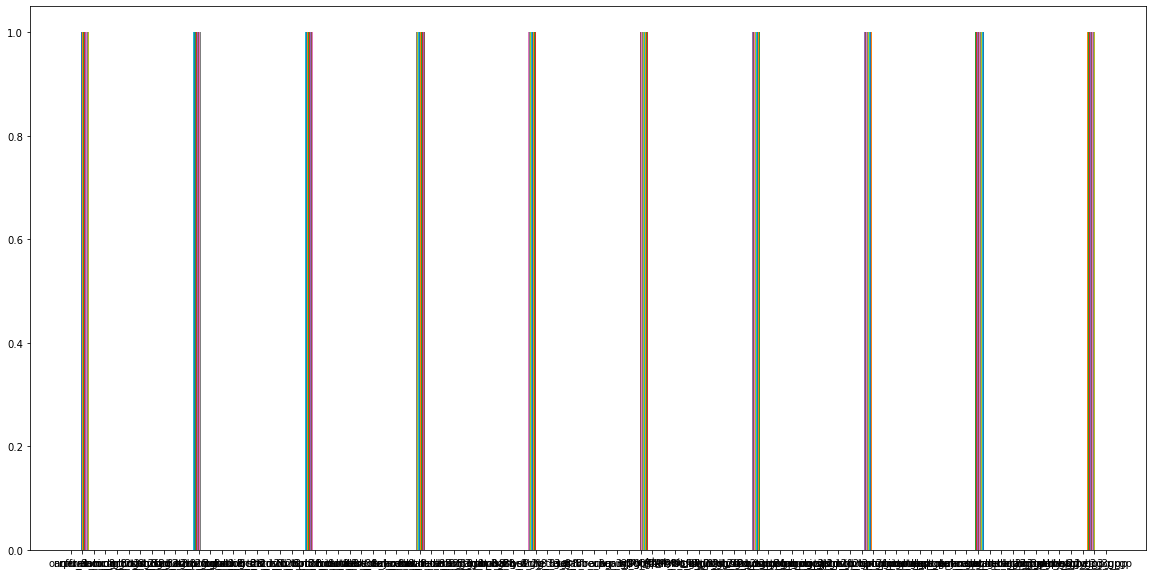

In [338]:
from matplotlib import pyplot
plt.figure(figsize = (20,10)) 
pyplot.hist(X_train)
plt.show()

In [95]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 18823
Before OverSampling, counts of label '0': 1784 

Before OverSampling, churn event rate : 91.34% 



In [96]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [97]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

After OverSampling, the shape of train_X: (37646, 90)
After OverSampling, the shape of train_y: (37646,) 

After OverSampling, counts of label '1': 18823
After OverSampling, counts of label '0': 18823
After OverSampling, churn event rate : 50.0% 



# Logistic Regression for feature identification

In [98]:
import statsmodels.api as sm

In [99]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,total_rech_amt,fb_user_gp,arpu_3g_gp,arpu_2g_gp,arpu_gp,arpu Analysis,onnet_mou_gp,offnet_mou_gp,roam_ic_mou_gp,roam_og_mou_gp,loc_og_t2t_mou_gp,loc_og_t2m_mou_gp,loc_og_t2f_mou_gp,loc_og_t2c_mou_gp,std_og_t2t_mou_gp,std_og_t2m_mou_gp,std_og_t2f_mou_gp,isd_og_mou_gp,spl_og_mou_gp,total_og_mou_gp,loc_ic_t2t_mou_gp,loc_ic_t2m_mou_gp,loc_ic_t2f_mou_gp,std_ic_t2t_mou_gp,std_ic_t2m_mou_gp,std_ic_t2f_mou_gp,spl_ic_mou_gp,isd_ic_mou_gp,ic_others_gp,total_rech_num_gp,total_rech_amt_gp,max_rech_amt_gp,last_day_rch_amt_gp,total_rech_data_gp,max_rech_data_gp,count_rech_2g_gp,count_rech_3g_gp,av_rech_amt_data_gp,vol_2g_mb_gp,vol_3g_mb_gp,monthly_2g_gp,sachet_2g_gp,monthly_3g_gp,sachet_3g_gp,vbc_3g_gp
0,-1.58,-1.02,-2.43,2.07,2.08,-1.76,-1.94,-0.89,-0.55,-1.04,-1.32,-0.41,-0.27,-0.94,-0.53,-2.01,-1.85,-2.10,-1.13,-0.94,-1.30,-0.56,-0.29,-0.51,-0.54,-2.59,-2.19,-2.21,-1.44,-0.78,-0.79,-0.63,-0.43,-0.79,-0.65,-0.56,-0.38,-0.46,-0.34,-0.50,-0.36,-0.24,0.00,-0.06,-0.57,0.57,-0.82,-0.49,-0.64,-0.00,0.91,1.46,-1.77,1.53,1.68,2.10,-0.80,-1.04,0.35,0.86,-1.19,-0.53,-0.36,-0.72,0.56,0.12,-1.18,-1.26,0.13,-1.02,-0.68,-0.56,-0.61,-0.65,0.14,0.57,0.18,0.26,-0.87,-0.89,-0.72,-0.54,-0.90,-0.76,-0.63,-0.43,-0.55,-0.43,-0.33,-0.62
1,-0.24,-0.67,-0.14,-0.49,-0.49,-0.29,0.53,0.11,-0.55,0.27,0.01,-0.41,-0.27,-0.01,2.03,-0.42,-0.31,0.87,-1.13,1.30,0.42,-0.56,-0.29,-0.51,-0.54,1.01,-0.13,-0.57,-0.26,1.74,0.98,1.83,-0.43,1.31,1.70,-0.56,-0.38,1.11,-0.34,2.08,-0.36,-0.24,1.00,-0.04,-0.57,-0.28,1.35,-0.49,1.22,-0.42,0.91,-0.42,-0.32,-0.66,-0.67,-0.06,0.43,1.33,-0.71,0.38,-0.12,-0.53,-0.36,-1.14,-0.65,-0.18,0.88,0.38,0.42,1.18,0.88,-0.56,-0.61,-0.65,1.21,-0.28,-1.38,-0.90,1.83,0.74,1.78,-0.54,1.14,1.49,-0.63,-0.43,2.02,-0.43,-0.33,-0.62
2,0.31,1.81,-1.50,-0.49,-0.49,-0.54,-0.98,-0.89,1.21,1.56,-0.50,-0.41,-0.27,1.26,-0.53,1.19,0.19,-1.18,-1.13,-0.51,0.56,-0.56,-0.29,-0.51,-0.54,0.66,0.44,0.18,0.84,-0.78,-0.79,-0.63,-0.43,-0.79,-0.65,-0.56,-0.38,-0.46,-0.34,-0.50,-0.36,-0.24,0.00,0.99,-0.57,-0.61,-0.82,-0.49,-0.64,-0.50,-1.19,1.22,-2.29,1.58,1.60,-1.10,-1.81,-1.04,1.30,1.33,-1.19,-0.53,-0.36,-0.06,0.22,-0.27,-2.30,-1.26,0.44,-1.56,-0.68,-0.56,-0.61,-0.65,1.25,-0.61,-1.93,-0.72,-0.87,-0.89,-0.72,-0.54,-0.90,-0.76,-0.63,-0.43,-0.55,-0.43,-0.33,-0.62
3,-1.85,-0.62,-0.69,-0.49,-0.49,-0.43,-0.45,-0.89,-0.55,-1.04,-0.67,-0.41,-0.27,-0.94,1.83,-2.01,-0.27,-0.29,-0.42,-0.94,-0.47,-0.56,-0.29,-0.51,-0.54,-1.33,-2.19,-2.21,-1.44,-0.78,-0.79,-0.63,-0.43,-0.79,-0.65,-0.56,-0.38,-0.46,-0.34,-0.50,-0.36,-0.24,0.00,0.46,-0.57,-1.14,0.89,0.78,1.29,-0.77,0.91,-1.15,-1.02,1.49,0.95,-0.57,-0.17,-1.04,1.54,-0.34,-0.74,-0.53,3.12,0.66,-1.34,0.26,0.25,-1.26,0.83,-0.16,1.93,-0.56,1.93,1.21,-0.42,-1.14,-0.68,-0.34,0.85,0.74,0.94,1.74,0.82,1.38,-0.63,-0.43,1.43,-0.43,3.02,-0.62
4,-0.37,1.37,-1.36,-0.49,-0.49,0.45,-0.88,-0.89,-0.55,1.42,-0.27,-0.41,-0.27,-0.94,-0.53,0.58,-0.54,-1.34,-1.13,-0.90,1.10,-0.56,-0.29,-0.51,-0.54,0.84,-0.19,-1.01,-0.22,-0.78,-0.79,-0.63,-0.43,-0.79,-0.65,-0.56,-0.38,-0.46,-0.34,-0.50,-0.36,-0.24,0.00,-1.04,-0.57,-1.15,-0.82,-0.49,-0.64,-0.75,0.91,1.17,-2.05,-0.66,-0.67,0.30,-1.54,-1.04,1.56,1.30,-0.54,-0.53,-0.36,0.30,0.22,-1.05,-1.93,-1.26,0.15,1.03,-0.68,1.93,-0.61,-0.65,1.01,-1.15,-1.69,-1.01,0.32,1.13,-0.72,1.74,1.00,-0.76,-0.63,-0.43,-0.55,2.28,-0.33,-0.62


## RFE 
Recursive Feature elimination

In [100]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [101]:
logreg=LogisticRegression()
rfe=RFE(logreg,15)
re=rfe.fit(X_train,y_train)

In [102]:
rfe.support_

array([False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [103]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_8', False, 59),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 26),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 34),
 ('loc_og_t2m_mou_8', False, 6),
 ('loc_og_t2f_mou_8', False, 8),
 ('loc_og_t2c_mou_8', False, 64),
 ('std_og_t2t_mou_8', False, 11),
 ('std_og_t2m_mou_8', False, 32),
 ('std_og_t2f_mou_8', False, 70),
 ('isd_og_mou_8', False, 27),
 ('spl_og_mou_8', False, 30),
 ('og_others_6', False, 31),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 33),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 49),
 ('std_ic_t2t_mou_8', False, 12),
 ('std_ic_t2m_mou_8', False, 55),
 ('std_ic_t2f_mou_8', False, 17),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 56),
 ('ic_others_8', False, 52),
 ('total_rech_num_8', False, 14),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 28),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', False, 2),
 ('max_rech_data_8', True, 1),
 ('count_rech_2g_8',

In [104]:
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_3g_8',
       'av_rech_amt_data_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'arpu_gp'],
      dtype='object')

##### Assessing the model with StatsModels

In [105]:
X_train_sm = X_train[col]
logm2 = sm.Logit(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.348636
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37646
Model:                          Logit   Df Residuals:                    37630
Method:                           MLE   Df Model:                           15
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.4970
Time:                        19:15:23   Log-Likelihood:                -13125.
converged:                       True   LL-Null:                       -26094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5120      0.021     70.775      0.000       1.470       1.554
onnet_mou_8           -0.4914      0.024    -20.068      0.000      -0.539      -0.443
offnet_mou_8          -0.5367      0.027    -19.773      0.000      -0.590      -0.483
roam_og_mou_8         -0.5547      0.015    -37.172      0.000      -0.584      -0.525
total_og_mou_8         1.3423      0.035     38.839      0.000       1.275       1.410
loc_ic_t2m_mou_8       0.3933      0.021     18.333      0.000       0.351       0.435
spl_ic_mou_8           0.4545      0.026     17.538      0.000       0.404       0.505
total_rech_amt_8       0.4199      0.029     14.318      0.000       0.362       0.477
last_day_rch_amt_8     0.6623      0.019     34.190      0.000       0.624       0.700
max_rech_data_8       -1.1452      0.274     -4.178      0.000      -1.682      -0.608
count_rech_3g_8       -1.0473      0.162     -6.453      0.000      -1.365      -0.729
av_rech_amt_data_8     1.7363      0.274      6.342      0.000       1.200       2.273
monthly_3g_8           0.8492      0.139      6.113      0.000       0.577       1.122
sachet_3g_8            0.5349      0.099      5.407      0.000       0.341       0.729
aon                    0.3927      0.018     21.937      0.000       0.358       0.428
arpu_gp               -0.5558      0.020    -28.126      0.000      -0.595      -0.517
======================================================================================
"""

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [107]:
getVIF(X_train_sm)

,Features,VIF
8,max_rech_data_8,231.64
10,av_rech_amt_data_8,231.13
9,count_rech_3g_8,22.14
11,monthly_3g_8,14.73
12,sachet_3g_8,6.65
6,total_rech_amt_8,6.52
3,total_og_mou_8,6.03
1,offnet_mou_8,3.12
4,loc_ic_t2m_mou_8,2.38
7,last_day_rch_amt_8,2.25


<AxesSubplot:>

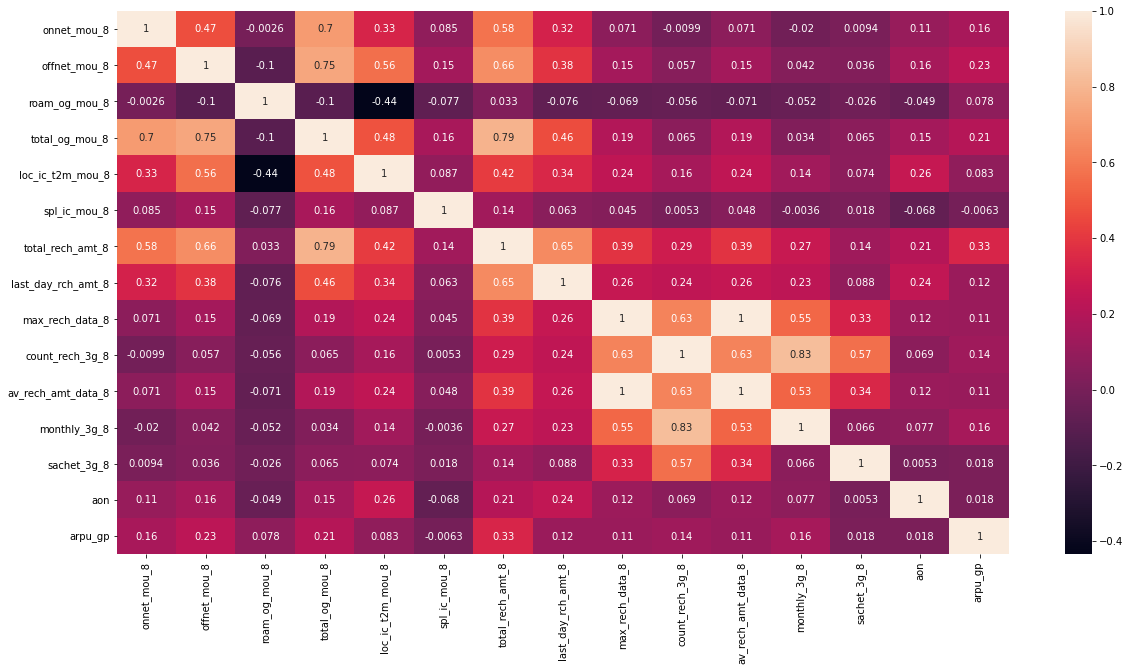

In [108]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_sm.corr(),annot = True)

- max_rech_data_8 is having the highest VIF and is strongly corelated with count_rech_3g_8, and montly_3g_8. Let's remove this

In [109]:
X_train_sm2 = X_train_sm.drop('max_rech_data_8', axis=1)

In [110]:
logm2 = sm.Logit(y_train,sm.add_constant(X_train_sm2), family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.348875
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37646
Model:                          Logit   Df Residuals:                    37631
Method:                           MLE   Df Model:                           14
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.4967
Time:                        19:15:26   Log-Likelihood:                -13134.
converged:                       True   LL-Null:                       -26094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5101      0.021     70.844      0.000       1.468       1.552
onnet_mou_8           -0.4910      0.024    -20.063      0.000      -0.539      -0.443
offnet_mou_8          -0.5378      0.027    -19.821      0.000      -0.591      -0.485
roam_og_mou_8         -0.5556      0.015    -37.255      0.000      -0.585      -0.526
total_og_mou_8         1.3408      0.035     38.818      0.000       1.273       1.408
loc_ic_t2m_mou_8       0.3932      0.021     18.342      0.000       0.351       0.435
spl_ic_mou_8           0.4545      0.026     17.557      0.000       0.404       0.505
total_rech_amt_8       0.4262      0.029     14.557      0.000       0.369       0.484
last_day_rch_amt_8     0.6572      0.019     33.965      0.000       0.619       0.695
count_rech_3g_8       -1.0205      0.157     -6.483      0.000      -1.329      -0.712
av_rech_amt_data_8     0.5999      0.024     24.527      0.000       0.552       0.648
monthly_3g_8           0.8032      0.134      5.980      0.000       0.540       1.066
sachet_3g_8            0.5326      0.096      5.553      0.000       0.345       0.721
aon                    0.3921      0.018     21.910      0.000       0.357       0.427
arpu_gp               -0.5617      0.020    -28.526      0.000      -0.600      -0.523
======================================================================================
"""

In [111]:
getVIF(X_train_sm2)

,Features,VIF
8,count_rech_3g_8,22.14
10,monthly_3g_8,14.66
11,sachet_3g_8,6.61
6,total_rech_amt_8,6.49
3,total_og_mou_8,6.03
1,offnet_mou_8,3.12
4,loc_ic_t2m_mou_8,2.38
7,last_day_rch_amt_8,2.23
0,onnet_mou_8,2.22
9,av_rech_amt_data_8,1.99


<AxesSubplot:>

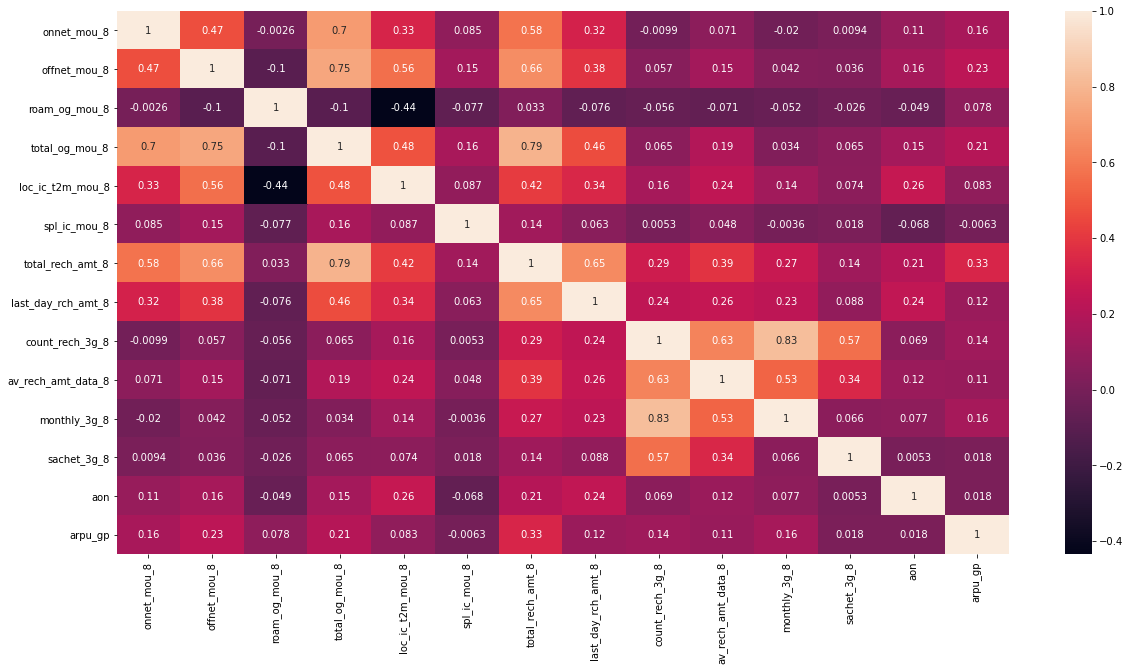

In [112]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_sm2.corr(),annot = True)

- count_rech_3g_8 is having the highest VIF and is corelated with sachet_3g_8, and montly_3g_8. Let's remove this

In [113]:
X_train_sm3 = X_train_sm2.drop('count_rech_3g_8', axis=1)

In [114]:
logm3 = sm.Logit(y_train,sm.add_constant(X_train_sm3), family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

Optimization terminated successfully.
         Current function value: 0.349740
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37646
Model:                          Logit   Df Residuals:                    37632
Method:                           MLE   Df Model:                           13
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.4954
Time:                        19:15:29   Log-Likelihood:                -13166.
converged:                       True   LL-Null:                       -26094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4914      0.021     71.341      0.000       1.450       1.532
onnet_mou_8           -0.4907      0.024    -20.079      0.000      -0.539      -0.443
offnet_mou_8          -0.5371      0.027    -19.805      0.000      -0.590      -0.484
roam_og_mou_8         -0.5543      0.015    -37.217      0.000      -0.583      -0.525
total_og_mou_8         1.3459      0.035     38.979      0.000       1.278       1.414
loc_ic_t2m_mou_8       0.3879      0.021     18.128      0.000       0.346       0.430
spl_ic_mou_8           0.4548      0.026     17.584      0.000       0.404       0.505
total_rech_amt_8       0.4218      0.029     14.421      0.000       0.364       0.479
last_day_rch_amt_8     0.6553      0.019     33.897      0.000       0.617       0.693
av_rech_amt_data_8     0.5728      0.024     23.923      0.000       0.526       0.620
monthly_3g_8          -0.0275      0.025     -1.119      0.263      -0.076       0.021
sachet_3g_8           -0.0443      0.021     -2.142      0.032      -0.085      -0.004
aon                    0.3938      0.018     22.033      0.000       0.359       0.429
arpu_gp               -0.5608      0.020    -28.561      0.000      -0.599      -0.522
======================================================================================
"""

- monthly_3g_8 has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [115]:
X_train_sm4 = X_train_sm3.drop('monthly_3g_8', axis=1)

In [116]:
logm4 = sm.Logit(y_train,sm.add_constant(X_train_sm4), family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

Optimization terminated successfully.
         Current function value: 0.349757
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37646
Model:                          Logit   Df Residuals:                    37633
Method:                           MLE   Df Model:                           12
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.4954
Time:                        19:15:30   Log-Likelihood:                -13167.
converged:                       True   LL-Null:                       -26094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4906      0.021     71.381      0.000       1.450       1.532
onnet_mou_8           -0.4906      0.024    -20.071      0.000      -0.538      -0.443
offnet_mou_8          -0.5375      0.027    -19.811      0.000      -0.591      -0.484
roam_og_mou_8         -0.5530      0.015    -37.246      0.000      -0.582      -0.524
total_og_mou_8         1.3535      0.034     39.928      0.000       1.287       1.420
loc_ic_t2m_mou_8       0.3876      0.021     18.115      0.000       0.346       0.430
spl_ic_mou_8           0.4550      0.026     17.597      0.000       0.404       0.506
total_rech_amt_8       0.4155      0.029     14.471      0.000       0.359       0.472
last_day_rch_amt_8     0.6542      0.019     33.869      0.000       0.616       0.692
av_rech_amt_data_8     0.5599      0.021     26.766      0.000       0.519       0.601
sachet_3g_8           -0.0400      0.020     -1.969      0.049      -0.080      -0.000
aon                    0.3944      0.018     22.077      0.000       0.359       0.429
arpu_gp               -0.5626      0.020    -28.746      0.000      -0.601      -0.524
======================================================================================
"""

In [117]:
getVIF(X_train_sm4)

,Features,VIF
6,total_rech_amt_8,6.29
3,total_og_mou_8,5.87
1,offnet_mou_8,3.11
4,loc_ic_t2m_mou_8,2.37
7,last_day_rch_amt_8,2.22
0,onnet_mou_8,2.21
8,av_rech_amt_data_8,1.55
2,roam_og_mou_8,1.46
10,aon,1.17
11,arpu_gp,1.17


<AxesSubplot:>

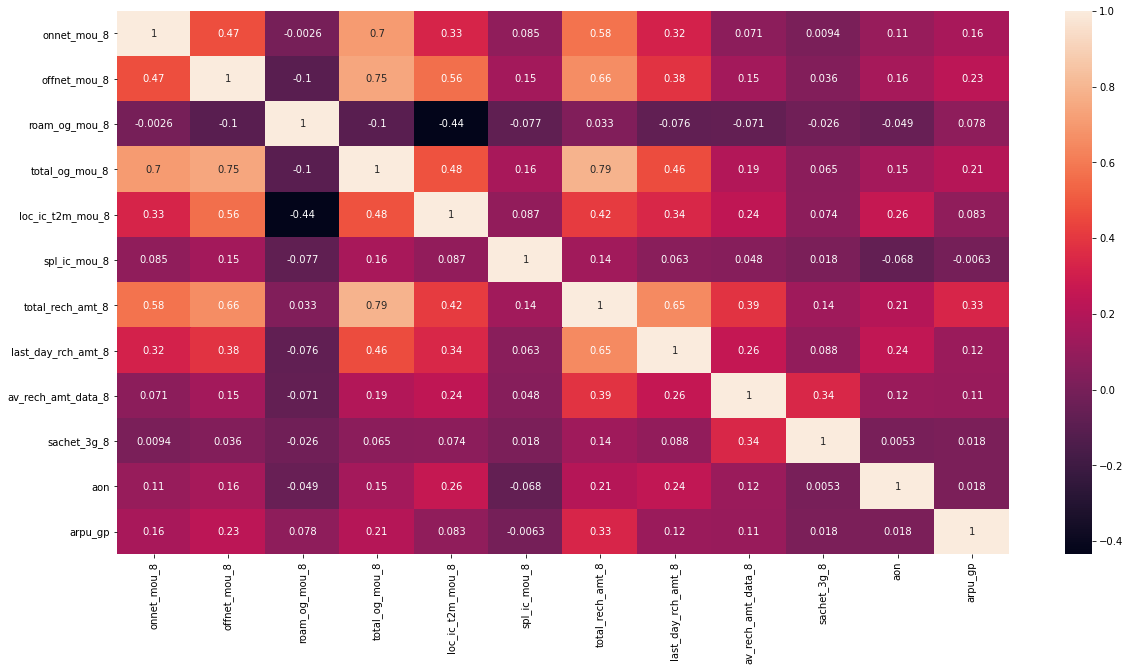

In [118]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_sm4.corr(),annot = True)

- total_rech_amt_8 having highest VIF and also corelated with total_og_mou_8 , offnet_mou_8 and last_day_rch_amt_8, let's remove this

In [119]:
X_train_sm5 = X_train_sm4.drop('total_rech_amt_8', axis=1)

In [120]:
logm5 = sm.Logit(y_train,sm.add_constant(X_train_sm5), family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

Optimization terminated successfully.
         Current function value: 0.352546
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37646
Model:                          Logit   Df Residuals:                    37634
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.4914
Time:                        19:15:33   Log-Likelihood:                -13272.
converged:                       True   LL-Null:                       -26094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5012      0.021     71.457      0.000       1.460       1.542
onnet_mou_8           -0.4740      0.024    -19.473      0.000      -0.522      -0.426
offnet_mou_8          -0.4993      0.027    -18.438      0.000      -0.552      -0.446
roam_og_mou_8         -0.5190      0.015    -35.469      0.000      -0.548      -0.490
total_og_mou_8         1.5580      0.031     50.024      0.000       1.497       1.619
loc_ic_t2m_mou_8       0.4003      0.022     18.597      0.000       0.358       0.443
spl_ic_mou_8           0.4743      0.026     18.302      0.000       0.424       0.525
last_day_rch_amt_8     0.7886      0.017     46.099      0.000       0.755       0.822
av_rech_amt_data_8     0.6675      0.020     33.902      0.000       0.629       0.706
sachet_3g_8           -0.0360      0.020     -1.771      0.077      -0.076       0.004
aon                    0.4021      0.018     22.579      0.000       0.367       0.437
arpu_gp               -0.4686      0.018    -25.654      0.000      -0.504      -0.433
======================================================================================
"""

- sachet_3g_8 has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [121]:
X_train_sm6 = X_train_sm5.drop('sachet_3g_8', axis=1)

In [122]:
logm6 = sm.Logit(y_train,sm.add_constant(X_train_sm6), family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

Optimization terminated successfully.
         Current function value: 0.352587
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37646
Model:                          Logit   Df Residuals:                    37635
Method:                           MLE   Df Model:                           10
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.4913
Time:                        19:15:33   Log-Likelihood:                -13273.
converged:                       True   LL-Null:                       -26094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5005      0.021     71.455      0.000       1.459       1.542
onnet_mou_8           -0.4722      0.024    -19.420      0.000      -0.520      -0.425
offnet_mou_8          -0.4971      0.027    -18.380      0.000      -0.550      -0.444
roam_og_mou_8         -0.5192      0.015    -35.484      0.000      -0.548      -0.491
total_og_mou_8         1.5553      0.031     50.042      0.000       1.494       1.616
loc_ic_t2m_mou_8       0.3995      0.022     18.563      0.000       0.357       0.442
spl_ic_mou_8           0.4747      0.026     18.313      0.000       0.424       0.525
last_day_rch_amt_8     0.7879      0.017     46.101      0.000       0.754       0.821
av_rech_amt_data_8     0.6557      0.018     35.502      0.000       0.619       0.692
aon                    0.4035      0.018     22.684      0.000       0.369       0.438
arpu_gp               -0.4677      0.018    -25.620      0.000      -0.503      -0.432
======================================================================================
"""

In [123]:
getVIF(X_train_sm6)

,Features,VIF
3,total_og_mou_8,4.48
1,offnet_mou_8,3.02
4,loc_ic_t2m_mou_8,2.37
0,onnet_mou_8,2.19
6,last_day_rch_amt_8,1.60
2,roam_og_mou_8,1.39
7,av_rech_amt_data_8,1.21
8,aon,1.17
9,arpu_gp,1.08
5,spl_ic_mou_8,1.07


<AxesSubplot:>

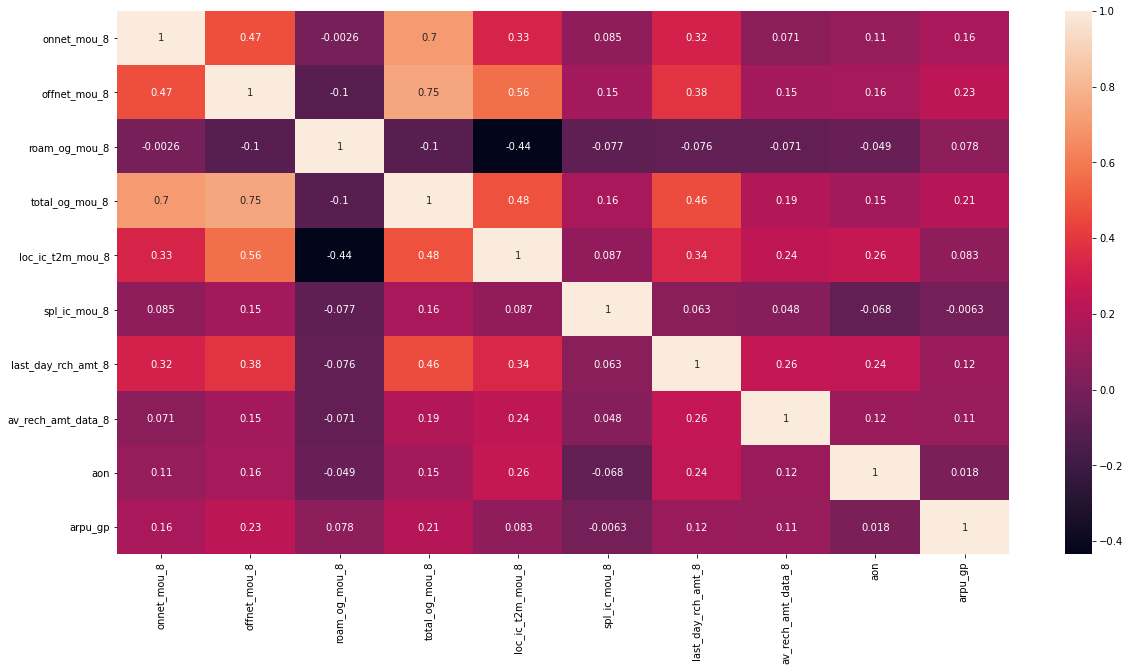

In [124]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_sm6.corr(),annot = True)

- 

In [125]:
type(X_train_sm6)

pandas.core.frame.DataFrame

In [126]:
cols=X_train_sm6.columns
cols

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'aon', 'arpu_gp'],
      dtype='object')

#### Predicting on Data

In [226]:
y_train_pred_df =pd.DataFrame({"actual":y_train,
                        "predicted_prob": res6.predict(sm.add_constant(X_train_sm6))})

In [227]:
y_train_pred_df.head()

,actual,predicted_prob
0,0,0.02
1,1,0.93
2,1,0.97
3,0,0.11
4,1,0.78


In [228]:
y_test_pred_df =pd.DataFrame({"actual":y_test,
                        "predicted_prob": res6.predict(sm.add_constant(X_test[cols]))})

In [229]:
y_test_pred_df.head()

,actual,predicted_prob
mobile_number,,
7001665309,1,0.69
7000319024,1,0.94
7001602180,1,0.87
7002038965,1,0.99
7000749747,1,0.93


In [230]:
y_train_pred_df['Predicted']=y_train_pred_df.predicted_prob.map(lambda x:1 if x>0.5 else 0)

In [231]:
y_train_pred_df.sample(n=8)

,actual,predicted_prob,Predicted
5994,1,0.95,1
19549,1,0.98,1
37613,0,0.07,0
32884,0,0.09,0
5212,1,0.85,1
19046,1,0.95,1
15114,1,0.93,1
18389,1,0.93,1


In [232]:
from sklearn import metrics
import seaborn as sn
def draw_cm(actual,predicted):
    cm=metrics.confusion_matrix(actual,predicted,[1,0])
    sn.heatmap(cm,annot=True,fmt='.2f')
    
    plt.show()

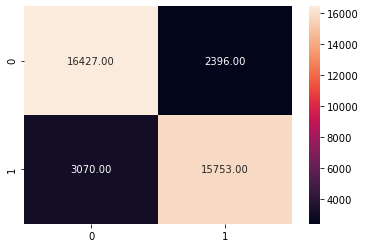

In [233]:
draw_cm(y_train_pred_df.actual,y_train_pred_df.Predicted)

In [234]:
print(metrics.classification_report(y_train_pred_df.actual,y_train_pred_df.Predicted))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     18823
           1       0.84      0.87      0.86     18823

    accuracy                           0.85     37646
   macro avg       0.86      0.85      0.85     37646
weighted avg       0.86      0.85      0.85     37646



In [235]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_df.actual,y_train_pred_df.Predicted )
confusion

array([[15753,  3070],
       [ 2396, 16427]], dtype=int64)

In [236]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [237]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8727089199383733

In [238]:
# Let us calculate specificity
TN / float(TN+FP)

0.8369016628592679

In [239]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16309833714073207


In [240]:
# positive predictive value 
print (TP / float(TP+FP))

0.8425398779299379


In [241]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8679817069811009


Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [242]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [243]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.actual,y_train_pred_df.Predicted)

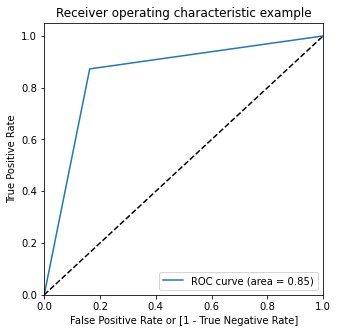

In [244]:
draw_roc(y_train_pred_df.actual,y_train_pred_df.Predicted)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [249]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,actual,predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.02,0,1,0,0,0,0,0,0,0,0,0
1,1,0.93,1,1,1,1,1,1,1,1,1,1,1
2,1,0.97,1,1,1,1,1,1,1,1,1,1,1
3,0,0.11,0,1,1,0,0,0,0,0,0,0,0
4,1,0.78,1,1,1,1,1,1,1,1,1,0,0


In [250]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.76   0.97   0.54
0.20  0.20      0.82   0.95   0.68
0.30  0.30      0.84   0.93   0.75
0.40  0.40      0.85   0.90   0.80
0.50  0.50      0.85   0.87   0.84
0.60  0.60      0.85   0.83   0.88
0.70  0.70      0.83   0.76   0.91
0.80  0.80      0.80   0.65   0.95
0.90  0.90      0.71   0.44   0.98


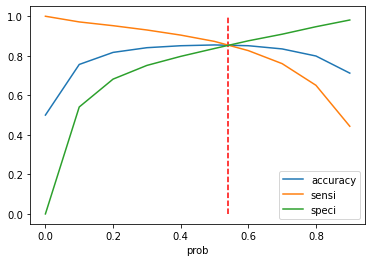

In [254]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

#### From the curve above, 5.4 is the optimum point to take it as a cutoff probability.

In [256]:
y_train_pred_df['final_Predicted']=y_train_pred_df.predicted_prob.map(lambda x:1 if x>0.54 else 0)
y_train_pred_df.head()

,actual,predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.02,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.93,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.97,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.11,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.78,1,1,1,1,1,1,1,1,1,0,0,1


In [369]:
y_test_pred_df['final_Predicted']=y_test_pred_df.predicted_prob.map(lambda x:1 if x>0.54 else 0)
y_test_pred_df.head()

,actual,predicted_prob,Predicted,final_Predicted
mobile_number,,,,
7001665309,1,0.76,1,1
7000319024,1,0.92,1,1
7001602180,1,0.95,1,1
7002038965,1,0.97,1,1
7000749747,1,0.95,1,1


In [258]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_df.actual,y_test_pred_df.final_Predicted)

0.8541666666666666

In [259]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test_pred_df.actual,y_test_pred_df.final_Predicted )
confusion

array([[ 624,  141],
       [1147, 6920]], dtype=int64)

In [260]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [261]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8578157927358374

In [262]:
# Let us calculate specificity
TN / float(TN+FP)

0.8156862745098039

In [263]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1843137254901961


In [264]:
# positive predictive value 
print (TP / float(TP+FP))

0.9800311570599065


In [265]:
# Negative predictive value
print (TN / float(TN+ FN))

0.352343308865048


## Precision and Recall
TP / TP + FP

In [266]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9800311570599065

##### Recall
TP / TP + FN

In [267]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8578157927358374

In [268]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test_pred_df.actual, y_test_pred_df.predicted_prob)

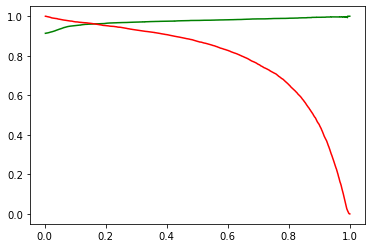

In [269]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Decision Trees without PCA

In [414]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,class_weight="balanced")
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [415]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.41      0.76      0.53       765
           1       0.97      0.90      0.93      8067

    accuracy                           0.88      8832
   macro avg       0.69      0.83      0.73      8832
weighted avg       0.93      0.88      0.90      8832



In [416]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[ 578  187]
 [ 831 7236]]
0.8847373188405797


In [417]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train.columns[:])
features

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_8',
 'aon',
 'aug_vbc_3g',
 'total_rech_amt',
 'fb_user_gp',
 'arpu_3g_gp',
 'arpu_2g_gp',
 'arpu_gp',
 'arpu Analysis',
 'onnet_mou_gp',
 'offnet_mou_gp',
 'roam_ic_mou_gp',
 'roam_og_mou_gp',
 'loc_og_

In [ ]:
# plotting tree
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [424]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 6, 1),
    'min_samples_leaf': range(20, 700, 100),
    'min_samples_split': range(20, 700, 100),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 490 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed: 14.4min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 6),
                         'min_samples_leaf': range(20, 700, 100),
                         'min_samples_split': range(20, 700, 100)},
             verbose=1)

In [425]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.30,0.04,0.01,0.00,entropy,1,20,20,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
1,0.27,0.00,0.01,0.00,entropy,1,20,120,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
2,0.29,0.02,0.01,0.00,entropy,1,20,220,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
3,0.29,0.03,0.01,0.00,entropy,1,20,320,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
4,0.26,0.00,0.01,0.00,entropy,1,20,420,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
5,0.28,0.02,0.01,0.00,entropy,1,20,520,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
6,0.29,0.00,0.01,0.00,entropy,1,20,620,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
7,0.28,0.01,0.01,0.00,entropy,1,120,20,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
8,0.29,0.00,0.02,0.01,entropy,1,120,120,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442
9,0.26,0.00,0.02,0.01,entropy,1,120,220,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.77,0.77,0.78,0.77,0.01,442


In [426]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8775169690990258
DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=20)


In [427]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=20,
                                  min_samples_split=420)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=420,
                       random_state=100)

In [428]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8725090579710145

In [ ]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [433]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8701313405797102


In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [435]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.75      0.50       765
           1       0.97      0.88      0.93      8067

    accuracy                           0.87      8832
   macro avg       0.67      0.81      0.71      8832
weighted avg       0.92      0.87      0.89      8832



In [436]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 570  195]
 [ 952 7115]]


## PCA

In [174]:
from sklearn.decomposition import PCA

In [175]:
pca=PCA(svd_solver='randomized',random_state=100)

In [176]:
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [177]:
pca.components_

array([[ 1.80573567e-01,  7.92981603e-02,  1.23697075e-01, ...,
         1.14129149e-01,  7.13983590e-02,  1.33340560e-01],
       [ 1.74679333e-01,  1.91358456e-01,  1.97043520e-01, ...,
        -1.25075921e-01, -8.84618943e-02, -1.40095768e-01],
       [ 9.48567443e-02,  5.96367729e-02, -9.18501590e-03, ...,
         1.71668384e-02,  6.46188951e-02,  6.29728759e-03],
       ...,
       [ 1.38698411e-03,  9.61166131e-04, -2.20133743e-03, ...,
        -1.34940414e-02, -9.00736128e-03,  1.83976315e-03],
       [ 5.82941802e-04,  2.42267532e-04, -1.40816362e-03, ...,
         7.21872228e-04,  4.07430319e-06, -1.16640138e-03],
       [ 0.00000000e+00, -1.49482428e-16,  9.61506043e-17, ...,
         1.38440645e-16,  1.82063318e-16, -1.22823824e-18]])

In [178]:
pca.explained_variance_ratio_

array([1.93860236e-01, 1.26561908e-01, 7.45560487e-02, 5.59157255e-02,
       4.87938259e-02, 3.48924168e-02, 3.01223521e-02, 2.71324824e-02,
       2.53083256e-02, 2.23852049e-02, 2.19268063e-02, 1.85228083e-02,
       1.76427643e-02, 1.54508792e-02, 1.47021558e-02, 1.41210972e-02,
       1.12364537e-02, 1.10919606e-02, 1.09768585e-02, 1.02513019e-02,
       9.61943881e-03, 8.96750724e-03, 8.75922476e-03, 8.38919234e-03,
       8.14450143e-03, 7.69105152e-03, 7.25189935e-03, 6.97583513e-03,
       6.83165247e-03, 6.69914697e-03, 6.39068579e-03, 6.28952025e-03,
       5.95442424e-03, 5.64449588e-03, 5.48831060e-03, 5.35284874e-03,
       5.05248261e-03, 4.74493234e-03, 4.70343677e-03, 4.51310373e-03,
       4.16809150e-03, 4.05890780e-03, 3.81293619e-03, 3.73366746e-03,
       3.66197106e-03, 3.58204078e-03, 3.43462137e-03, 3.24855772e-03,
       3.14129921e-03, 2.77139096e-03, 2.66225279e-03, 2.54795780e-03,
       2.52624469e-03, 2.42736685e-03, 2.29562192e-03, 2.20612239e-03,
      

In [179]:
import matplotlib.pyplot as plt

<BarContainer object of 90 artists>

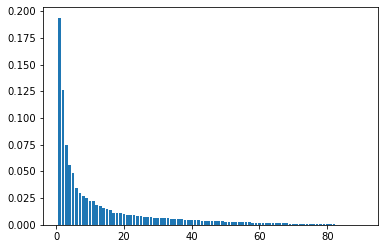

In [180]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [181]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

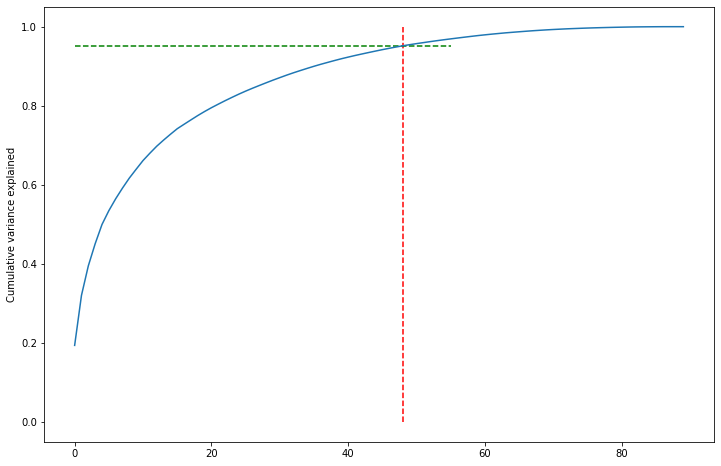

In [182]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=48, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=55, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

 48 components are enough to describe 95% of the variance in the dataset.  
 36 components are enough to describe 90% of the variance in the dataset.

In [183]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=48)

X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(37646, 48)

## correlation matrix

In [184]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

In [185]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.011204532096766877 , min corr:  -0.017498494429312443


<AxesSubplot:>

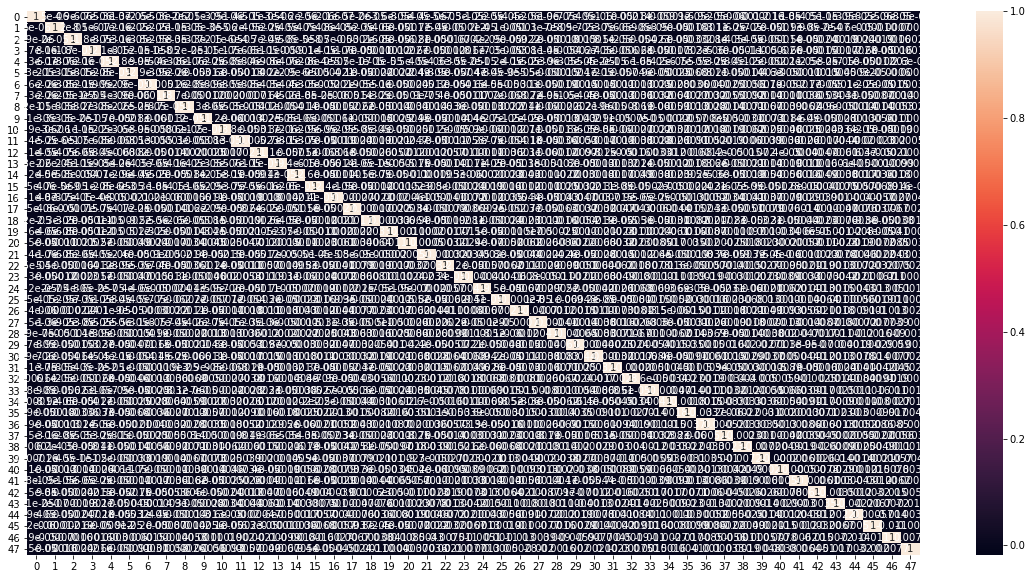

In [371]:
plt.figure(figsize = (20,10))  
sns.heatmap(corrmat,annot = True)

Applying the transformation on the test set

In [186]:
#Applying selected components to the test data - 40 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8832, 48)

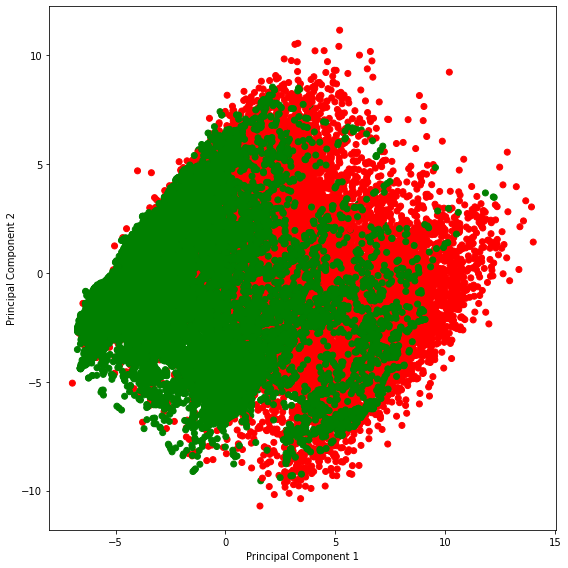

In [187]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Logistic Regression with PCA

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
learner_pca = LogisticRegression()

In [190]:
model_pca = learner_pca.fit(X_train_pca, y_train)

In [272]:
pred_probs_train = model_pca.predict_proba(X_train_pca)

Making predictions on the test set

In [191]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [192]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.91'

In [276]:
y_train_pred_df =pd.DataFrame({"actual":y_train,
                        "predicted_prob": pred_probs_train[:,1]})

In [277]:
y_train_pred_df.head()

,actual,predicted_prob
0,0,0.01
1,1,0.92
2,1,0.95
3,0,0.10
4,1,0.52


In [280]:
y_train_pred_df['Predicted']=y_train_pred_df.predicted_prob.map(lambda x:1 if x>0.5 else 0)

In [282]:
y_train_pred_df.sample(n=8)

,actual,predicted_prob,Predicted
24741,0,0.14,0
18682,1,0.59,1
14851,1,0.95,1
36337,0,0.68,1
6280,1,0.42,0
19612,1,0.63,1
672,1,0.88,1
36323,0,0.23,0


In [283]:
from sklearn import metrics
import seaborn as sn
def draw_cm(actual,predicted):
    cm=metrics.confusion_matrix(actual,predicted,[1,0])
    sn.heatmap(cm,annot=True,fmt='.2f')
    
    plt.show()

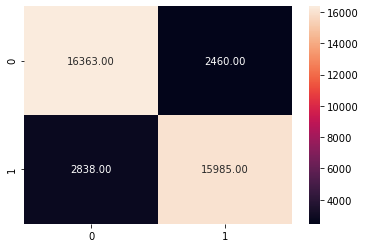

In [284]:
draw_cm(y_train_pred_df.actual,y_train_pred_df.Predicted)

In [285]:
print(metrics.classification_report(y_train_pred_df.actual,y_train_pred_df.Predicted))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     18823
           1       0.85      0.87      0.86     18823

    accuracy                           0.86     37646
   macro avg       0.86      0.86      0.86     37646
weighted avg       0.86      0.86      0.86     37646



###  Finding Optimal Cutoff Point

In [300]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_df[i]= y_test_pred_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_test_pred_df.head()

,actual,predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,,,,
7001665309,1,0.76,1,1,1,1,1,1,1,1,1,0,0
7000319024,1,0.92,1,1,1,1,1,1,1,1,1,1,1
7001602180,1,0.95,1,1,1,1,1,1,1,1,1,1,1
7002038965,1,0.97,1,1,1,1,1,1,1,1,1,1,1
7000749747,1,0.95,1,1,1,1,1,1,1,1,1,1,1


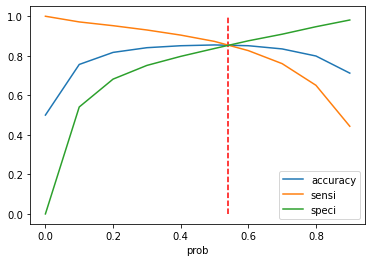

In [303]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

## predicting on test data

In [304]:
y_test_pred_df =pd.DataFrame({"actual":y_test,
                        "predicted_prob": pred_probs_test[:,1]})

In [305]:
y_test_pred_df.head()

,actual,predicted_prob
mobile_number,,
7001665309,1,0.76
7000319024,1,0.92
7001602180,1,0.95
7002038965,1,0.97
7000749747,1,0.95


In [306]:
y_test_pred_df['Predicted']=y_test_pred_df.predicted_prob.map(lambda x:1 if x>0.54 else 0)

In [307]:
y_test_pred_df.sample(n=8)

,actual,predicted_prob,Predicted
mobile_number,,,
7001241209,1,0.92,1
7002073138,1,0.98,1
7000303576,1,0.85,1
7000648261,1,0.96,1
7000833340,1,0.74,1
7001244774,1,0.98,1
7000666214,1,0.89,1
7000908607,1,0.97,1


In [308]:
from sklearn import metrics
import seaborn as sn
def draw_cm(actual,predicted):
    cm=metrics.confusion_matrix(actual,predicted,[1,0])
    sn.heatmap(cm,annot=True,fmt='.2f')
    
    plt.show()

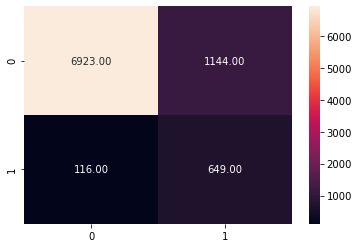

In [309]:
draw_cm(y_test_pred_df.actual,y_test_pred_df.Predicted)

In [310]:
print(metrics.classification_report(y_test_pred_df.actual,y_test_pred_df.Predicted))

              precision    recall  f1-score   support

           0       0.36      0.85      0.51       765
           1       0.98      0.86      0.92      8067

    accuracy                           0.86      8832
   macro avg       0.67      0.85      0.71      8832
weighted avg       0.93      0.86      0.88      8832



In [311]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test_pred_df.actual,y_test_pred_df.Predicted )
confusion

array([[ 649,  116],
       [1144, 6923]], dtype=int64)

In [312]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [313]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8581876781951159

In [314]:
# Let us calculate specificity
TN / float(TN+FP)

0.8483660130718954

In [315]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15163398692810456


In [316]:
# positive predictive value 
print (TP / float(TP+FP))

0.9835203864185253


In [317]:
# positive predictive value 
print (TP / float(TP+FP))

0.9835203864185253


In [318]:
# Negative predictive value
print (TN / float(TN+ FN))

0.3619631901840491


Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [320]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_df.actual,y_test_pred_df.Predicted)

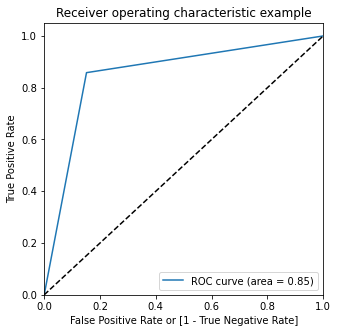

In [321]:
draw_roc(y_test_pred_df.actual,y_test_pred_df.Predicted)

##### Precision
TP / TP + FP

In [322]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9835203864185253

##### Recall
TP / TP + FN

In [325]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8581876781951159

## RandomForest with PCA

In [193]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [194]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [195]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [196]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [197]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       765
           1       0.96      0.96      0.96      8067

    accuracy                           0.93      8832
   macro avg       0.78      0.77      0.78      8832
weighted avg       0.93      0.93      0.93      8832



In [198]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 443  322]
 [ 290 7777]]


In [199]:
print(accuracy_score(y_test,predictions))

0.9307065217391305


### Hyperparameter Tuning

In [200]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [201]:
# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 28.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [202]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8682465595560335 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [205]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300)

In [206]:
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [207]:
# predict
predictions = rfc.predict(X_test_pca)

In [374]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.49      0.71      0.58       765
           1       0.97      0.93      0.95      8067

    accuracy                           0.91      8832
   macro avg       0.73      0.82      0.76      8832
weighted avg       0.93      0.91      0.92      8832



In [375]:
print(confusion_matrix(y_test,predictions))

[[ 540  225]
 [ 571 7496]]


In [376]:
confusion=confusion_matrix(y_test,predictions)

In [377]:
# check sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = predictions
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.93
Specificity: 	0.71
AUC:    	 0.82


##### Precision
TP / TP + FP

In [378]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9708586970599663

##### Recall
TP / TP + FN

In [379]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9292178009173174

- RandomForest using PCA gives 91% of accuracy with 97% of precision and recall of 93%

## XGBoost with PCA

In [327]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [328]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [329]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_pca)
y_pred[:10]

array([[3.5156345e-01, 6.4843655e-01],
       [5.7035685e-04, 9.9942964e-01],
       [9.1397762e-04, 9.9908602e-01],
       [3.2178164e-03, 9.9678218e-01],
       [4.5518994e-02, 9.5448101e-01],
       [5.9333086e-02, 9.4066691e-01],
       [7.3374510e-03, 9.9266255e-01],
       [8.0641508e-03, 9.9193585e-01],
       [5.3839803e-02, 9.4616020e-01],
       [2.8600693e-03, 9.9713993e-01]], dtype=float32)

In [330]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 89.14%


In [331]:
# hyperparameter tuning with XGBoost
from sklearn.model_selection import GridSearchCV
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.3], 
             'subsample': [0.2, 0.4, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [332]:
# fit the model
model_cv.fit(X_train_pca, y_train) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [333]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.89,0.25,0.05,0.00,0.10,0.20,"{'learning_rate': 0.1, 'subsample': 0.2}",0.94,0.95,0.95,0.95,0.00,5,0.96,0.95,0.95,0.95,0.00
1,5.56,0.17,0.05,0.00,0.10,0.40,"{'learning_rate': 0.1, 'subsample': 0.4}",0.94,0.95,0.95,0.95,0.00,6,0.96,0.95,0.95,0.95,0.00
2,6.28,0.16,0.05,0.01,0.10,0.60,"{'learning_rate': 0.1, 'subsample': 0.6}",0.94,0.95,0.95,0.95,0.00,7,0.96,0.95,0.95,0.95,0.00
3,7.00,0.25,0.05,0.00,0.10,0.90,"{'learning_rate': 0.1, 'subsample': 0.9}",0.94,0.95,0.95,0.95,0.00,8,0.96,0.95,0.95,0.96,0.00
4,3.71,0.24,0.07,0.02,0.30,0.20,"{'learning_rate': 0.3, 'subsample': 0.2}",0.95,0.96,0.97,0.96,0.01,4,0.97,0.97,0.97,0.97,0.00
5,5.45,0.14,0.06,0.01,0.30,0.40,"{'learning_rate': 0.3, 'subsample': 0.4}",0.95,0.96,0.97,0.96,0.01,2,0.98,0.97,0.97,0.97,0.00
6,5.97,0.26,0.05,0.00,0.30,0.60,"{'learning_rate': 0.3, 'subsample': 0.6}",0.95,0.96,0.97,0.96,0.01,3,0.98,0.97,0.97,0.97,0.00
7,6.74,0.40,0.06,0.01,0.30,0.90,"{'learning_rate': 0.3, 'subsample': 0.9}",0.96,0.97,0.97,0.96,0.01,1,0.98,0.97,0.97,0.97,0.00


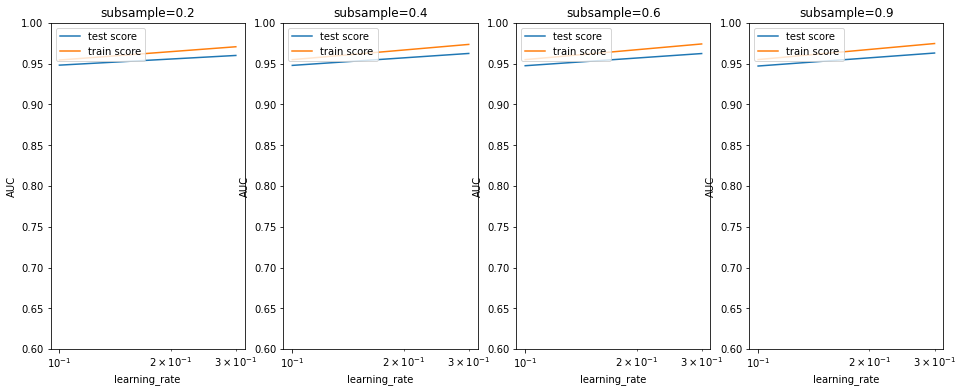

In [334]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1, 0.3], 
             'subsample': [0.2, 0.4, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df_xg = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df_xg["param_learning_rate"], df_xg["mean_test_score"])
    plt.plot(df_xg["param_learning_rate"], df_xg["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.1 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [335]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.1,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_pca, y_train) 

[20:22:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [336]:
# predict
y_pred = model.predict_proba(X_test_pca)
y_pred[:10]

array([[3.5156345e-01, 6.4843655e-01],
       [5.7035685e-04, 9.9942964e-01],
       [9.1397762e-04, 9.9908602e-01],
       [3.2178164e-03, 9.9678218e-01],
       [4.5518994e-02, 9.5448101e-01],
       [5.9333086e-02, 9.4066691e-01],
       [7.3374510e-03, 9.9266255e-01],
       [8.0641508e-03, 9.9193585e-01],
       [5.3839803e-02, 9.4616020e-01],
       [2.8600693e-03, 9.9713993e-01]], dtype=float32)

In [382]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.8913990752286205

In [388]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X_train_pca, y_train,cv=10,scoring='roc_auc')

[21:26:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:26:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:27:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [389]:
print(cv_score)

[0.98167338 0.98769035 0.98963967 0.98855524 0.99039056 0.98886931
 0.98978211 0.98987443 0.99019149 0.98906865]


In [392]:
print("Mean accuracy : ",np.mean(cv_score), " with standard deviation of : ",np.std(cv_score))

Mean accuracy :  0.9885735190128981  with standard deviation of :  0.0024276352313884354


In [430]:
# check sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = predictions
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.93
Specificity: 	0.71
AUC:    	 0.82


### Driver Variables of Churn and Churn Analysis 

- total_og_mou_8 - Higher the total outgoing minutes of uses lower the churn rate.

- roam_og_mou_8  - Higher the outcoming roaming amount in month 8, lower is the churn rate. Focus on customers whose outgoing roaming amount has increased, because they are less likely to churn.

- av_rech_amt_data_8 - Higher the average recharge amount data in 8 month lower the churn rate.

- onnet_mou_8 -  Lower the onnet mou in 8th month higher the churn rate.

- offnet_mou_8 - Lower the onffnet mou in 8th month higher the churn rate.

- loc_ic_t2m_mou_8 - Higher the local incoming t2m mou in 8th month, lower the churn rate.

- spl_ic_mou_8 - Higher the special ic mou in 8th month, lower the churn rate.

- arpu_gp - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

- last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

- aon - Higher the age on network, lower the churn rate.


### Recommendation

1. Offer discounted roaming outgoing packs

2. Monitor the total recharge, onnet mou (in action phase) offer additional talk time if onnet mou decrease in action phase

3. Give more discount to the customers who have been with the network for more than an year 

4. Based on the usage / last recharge, if the usage is less compared to previous months, speak to the customer to know his concerns

5. Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

In [ ]:
#                                            Precision                       Recall                      Accuracy     

#Logistics Regression without PCA               98%                           85.78%                       85.40%

#Decision Tree without PCA                      95%                           98%                          94%

#Logistics Regression with PCA                  98.35%                        85.81%                       86%                     

#RandomForest Classifier with PCA               97%                           92.92%                       91%

#XGBoost Classifier with PCA                    71%                            93%                         98.8%

Random forest classifier gives overall best result for give data. where as XGBoost Classifier with PCA has maximum accuracy of 98.8 %. Logistics Regression with PCA  has maximum precision where as Decision tree has maximum recall.